In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import size_contrast_opto_analysis as scoa
reload(scoa)
import retinotopy_analysis as rt
reload(rt)
import naka_rushton_analysis as nra
import pdb
import size_contrast_analysis as sca
import skimage.segmentation as sks
import skimage.morphology as skm
import sklearn

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
ds = sio.loadmat('/home/mossing/Documents/notebooks/shared_data/pyr_l23_data_struct.mat',squeeze_me=True) #,struct_as_record=True)

ValueError: Unknown mat file type, version 0, 0

In [3]:
keylist = [x for x in list(ds.keys()) if not x[0]=='_']

In [4]:
for k in range(len(keylist)):
    nangle = 8
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    print(ontarget_ret_lax.sum())

191
350
230
76
346
690
792
654
179
645


/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [92]:
keylist[1]

'session_181213_M8536'

In [5]:
for k in range(len(keylist)):
    print(np.nanmean(ds[keylist[k]]['running_speed_cm_s'][()]))

6.08450931939
50.3874252992
23.5956539465
2.33126464141
49.6074870187
2.00265037742
2.68606714995
35.9569319107
22.1687918868
5.51092901921


/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


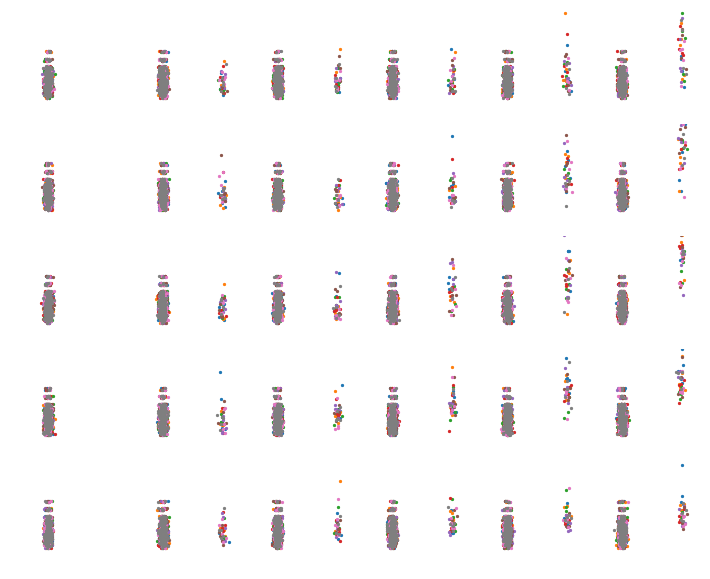

In [6]:
# Here, we plot the distribution of responses to zero-contrast vs. non-zero contrast stimuli, for all the on-target neurons in a particular mouse
k = 1
plt.figure(figsize=(12,10))
nsize = 5
ncontrast = 6
nangle = 8
size = ds[keylist[k]]['stimulus_id'][()][0]
contrast = ds[keylist[k]]['stimulus_id'][()][1]
running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
angle = ds[keylist[k]]['stimulus_id'][()][-1]
pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
for s in range(nsize):
    for c in range(ncontrast):
        plt.subplot(nsize,ncontrast,s*ncontrast+c+1)
        all_or_nothing = np.logical_or(contrast==0,contrast==c)
        for i in range(nangle): #(nangle):
            stim_of_interest = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running_speed_cm_s>7),all_or_nothing)
            nonzero_stim = contrast[stim_of_interest]>0
            X = ds[keylist[k]]['decon'][()].T[stim_of_interest][:,ontarget_ret_lax]
            y = nonzero_stim.copy()
            avg_across_rois = X.mean(1)
            plt.scatter(nonzero_stim+0.03*np.random.randn(nonzero_stim.size),avg_across_rois,s=5)
            plt.ylim((0,0.3))
            plt.xlim((-0.3,1.3))
            plt.axis('off')

In [7]:
k = 1
data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
data[np.isnan(data)] = 0
u,s,v = np.linalg.svd(data)

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


In [8]:
v.shape

(1400, 1400)

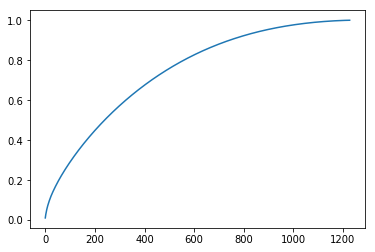

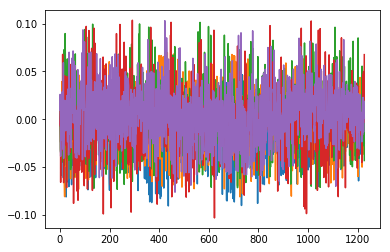

In [9]:
plt.figure()
plt.plot(np.cumsum(s)/s.sum())
plt.figure()
plt.plot(u[:,:5])

In [126]:
matfile = sio.loadmat('/home/mossing/Documents/notebooks/eye_tracking/eye_tracking_181213_M8536.mat',squeeze_me=True)
ctrx_trialwise = matfile['ctrx_trialwise']
ctry_trialwise = matfile['ctry_trialwise']
area_trialwise = matfile['area_trialwise']

In [127]:
def trialavg(arr):
    return np.nanmean(arr[:,8:-8],1)
ctrx = trialavg(ctrx_trialwise)
ctry = trialavg(ctry_trialwise)
area = trialavg(area_trialwise)

<IPython.core.display.Javascript object>


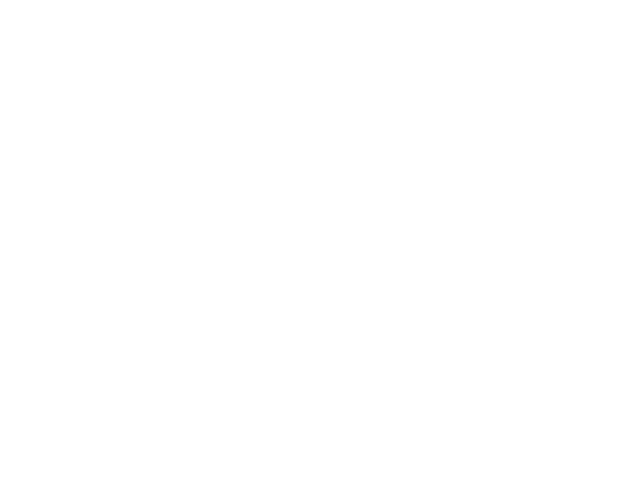

In [128]:
plt.figure()
plt.plot(ctrx_trialwise[0])

<IPython.core.display.Javascript object>


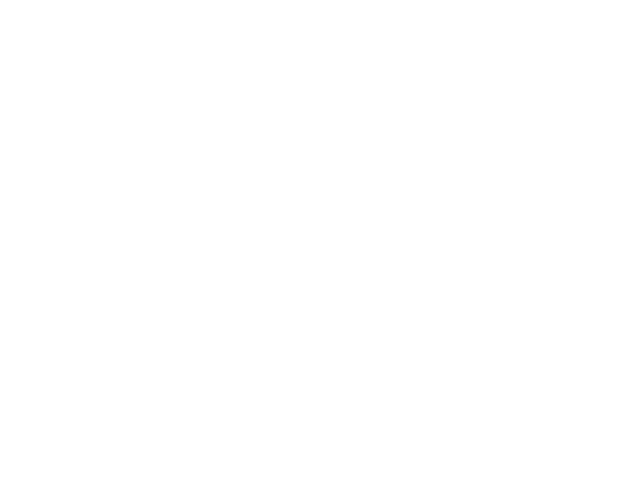

In [129]:
plt.figure()
plt.scatter(ctrx[:700],ctrx[700:])

<IPython.core.display.Javascript object>


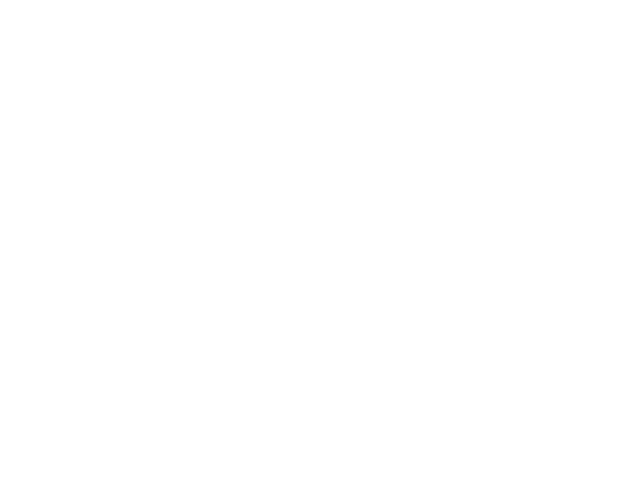

In [133]:
%matplotlib notebook
plt.figure()
eye_dist = np.sqrt((ctrx-np.nanmean(ctrx))**2+(ctry-np.nanmean(ctry))**2)
plt.plot(eye_dist)
plt.plot(area/area.max())

In [131]:
k = 1
data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
# plt.scatter(data)

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


In [132]:
keylist[1]

'session_181213_M8536'

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


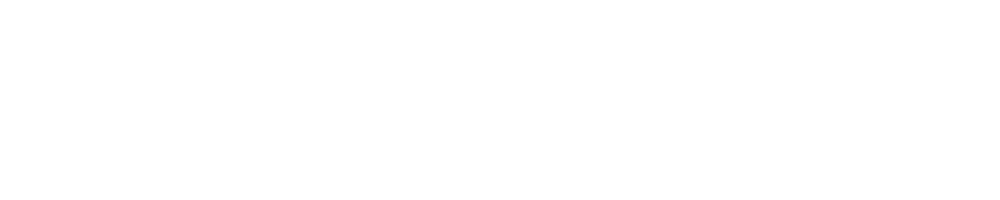

(0, 20, 0.47943308772444987)
(0, 20, 0.56152157562580152)
(0, 20, 0.6278664012209948)
(0, 20, 0.84658698059095172)
(0, 20, 0.68743513260607791)
(0, 20, 0.62719180272500241)
(0, 20, 0.76196991616889775)
(0, 20, 0.74811190586236831)
(1, 20, 0.64033067031898472)
(1, 20, 0.5048664607330503)
(1, 20, 0.81730227583524118)
(1, 20, 0.89347645777148677)
(1, 20, 0.83877263516421374)
(1, 20, 0.78550908446143541)
(1, 20, 0.83884800306114171)
(1, 20, 0.52877772992022021)
(2, 20, 0.89242420678190726)
(2, 20, 0.84697535098403387)
(2, 20, 0.83380466286732169)
(2, 20, 0.90825393545229527)
(2, 20, 0.86320020189316526)
(2, 20, 0.91518348215943723)
(2, 20, 0.78516232204024072)
(2, 20, 0.85470373403775601)
(3, 20, 0.91985333620250753)
(3, 20, 0.90993507799028706)
(3, 20, 0.86967782115500825)
(3, 20, 0.93538262487866142)
(3, 20, 0.94848167731959132)
(3, 20, 0.92525653843202182)
(3, 20, 0.89400124507749901)
(3, 20, 0.89886894751473445)
(4, 20, 0.95111007207893505)
(4, 20, 0.9620488226384909)
(4, 20, 0.9222002

In [135]:
nkey = len(keylist)
nangle = 8
R = [None]*nkey
top_score = [None]*nkey
cutoffs = np.round(np.arange(20,21)).astype('int')
# cutoffs = (50,)
for k in (1,): #range(len(keylist)):
    R[k] = [None]*len(cutoffs)
    data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
    data[np.isnan(data)] = 0
    
    u,sigma,v = np.linalg.svd(data)
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    size = ds[keylist[k]]['stimulus_id'][()][0]
    contrast = ds[keylist[k]]['stimulus_id'][()][1]
    angle = ds[keylist[k]]['stimulus_id'][()][-1]
    
    proc[k]['u'] = u
    proc[k]['sigma'] = sigma
    proc[k]['v'] = v  
    proc[k]['pval_ret'] = pval_ret
    proc[k]['dist_ret'] = dist_ret
    proc[k]['ontarget_ret_lax'] = ontarget_ret_lax
    proc[k]['running_speed_cm_s'] = running_speed_cm_s
    proc[k]['running'] = running
    proc[k]['size'] = size
    proc[k]['contrast'] = contrast
    proc[k]['angle'] = angle
    
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        top_score[k] = np.zeros((len(cutoffs),5,8))
        for icutoff,cutoff in enumerate(cutoffs):
            R[k][icutoff] = np.zeros((5,8,cutoff))
            plt.figure(figsize=(10,2))
            for s in range(5):
                plt.subplot(1,5,s+1)
                for i in range(nangle):
                    stim_of_interest_all_contrast = k_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running,eye_dist < np.nanpercentile(eye_dist,50))
                    X = (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]
                    uangle = np.unique(angle)
                    y = contrast[stim_of_interest_all_contrast] #>0

                    na = 50
                    sc = np.zeros((na,))
                    alphas = np.logspace(-2,2,na)
                    for ia,alpha in enumerate(alphas):
                        linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                        reg = linreg.fit(X,y)
                        scores = sklearn.model_selection.cross_validate(linreg,X,y)
                        pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                        sc[ia] = scores['test_score'].mean()
                    best_alpha = np.argmax(sc)
                    top_score[k][icutoff,s,i] = sc.max()
                    print((s,cutoff,top_score[k][icutoff,s,i]))
                    linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                    reg = linreg.fit(X,y)

                    R[k][icutoff][s,i] = reg.coef_

                    Xall =  (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]

                    ypred = reg.predict(Xall)

                    yactual = contrast[stim_of_interest_all_contrast]

                    plt.scatter(yactual+1*np.linspace(0,1,yactual.size),ypred,s=5)
                
#                 plt.plot(sc)
#                 plt.ylim(-1,1)

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


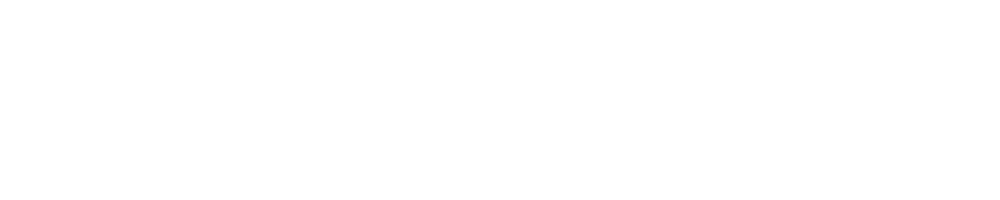

(0, 20, -0.006869282864011006)
(0, 20, -0.0088168915256309575)
(0, 20, -0.031266966344877169)
(0, 20, -0.025186604128747108)
(0, 20, 0.0021859904054418733)
(0, 20, -0.020106982559901843)
(0, 20, -0.10685961955875101)
(0, 20, 0.11374100643845297)
(1, 20, 0.34334779310797775)
(1, 20, -0.024784006455942361)
(1, 20, 0.25175585753656954)
(1, 20, -0.041666666666666664)
(1, 20, 0.041036632136681704)
(1, 20, 0.59559686799452638)
(1, 20, -0.010044375788353785)
(1, 20, 0.062317873986984185)
(2, 20, 0.4280254180550867)
(2, 20, 0.52724655972651002)
(2, 20, -0.34517550125433832)
(2, 20, -0.025506646538567823)
(2, 20, 0.80296369221611197)
(2, 20, 0.34642867230340163)
(2, 20, -0.072431522014253777)
(2, 20, 0.49523173992914704)
(3, 20, 0.76795946493204037)
(3, 20, 0.71548539519460974)
(3, 20, 0.79221792793948198)
(3, 20, 0.86729167854800304)
(3, 20, 0.89309057216860355)
(3, 20, 0.80223064200516259)
(3, 20, 0.58926436832336948)
(3, 20, 0.86760662142591682)
(4, 20, 0.75067560520670895)
(4, 20, 0.9328988

In [153]:
nkey = len(keylist)
nangle = 8
Rlow = [None]*nkey
top_score = [None]*nkey
cutoffs = np.round(np.arange(20,21)).astype('int')

eye_cutoff = 50

# cutoffs = (50,)
for k in (1,): #range(len(keylist)):
    Rlow[k] = [None]*len(cutoffs)
    data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
    data[np.isnan(data)] = 0
    
    u,sigma,v = np.linalg.svd(data)
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    size = ds[keylist[k]]['stimulus_id'][()][0]
    contrast = ds[keylist[k]]['stimulus_id'][()][1]
    angle = ds[keylist[k]]['stimulus_id'][()][-1]
    
    proc[k]['u'] = u
    proc[k]['sigma'] = sigma
    proc[k]['v'] = v  
    proc[k]['pval_ret'] = pval_ret
    proc[k]['dist_ret'] = dist_ret
    proc[k]['ontarget_ret_lax'] = ontarget_ret_lax
    proc[k]['running_speed_cm_s'] = running_speed_cm_s
    proc[k]['running'] = running
    proc[k]['size'] = size
    proc[k]['contrast'] = contrast
    proc[k]['angle'] = angle
    
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        top_score[k] = np.zeros((len(cutoffs),5,8))
        for icutoff,cutoff in enumerate(cutoffs):
            Rlow[k][icutoff] = np.zeros((5,8,cutoff))
            plt.figure(figsize=(10,2))
            for s in range(5):
                plt.subplot(1,5,s+1)
                for i in range(nangle):
                    stim_of_interest_all_contrast = k_and(np.logical_or(k_and(angle==i,size==s,contrast<4),contrast==0),running,eye_dist < np.nanpercentile(eye_dist,eye_cutoff))
                    X = (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]
                    uangle = np.unique(angle)
                    y = contrast[stim_of_interest_all_contrast] #>0

                    na = 50
                    sc = np.zeros((na,))
                    alphas = np.logspace(-2,2,na)
                    for ia,alpha in enumerate(alphas):
                        linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                        reg = linreg.fit(X,y)
                        scores = sklearn.model_selection.cross_validate(linreg,X,y)
                        pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                        sc[ia] = scores['test_score'].mean()
                    best_alpha = np.argmax(sc)
                    top_score[k][icutoff,s,i] = sc.max()
                    print((s,cutoff,top_score[k][icutoff,s,i]))
                    linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                    reg = linreg.fit(X,y)

                    Rlow[k][icutoff][s,i] = reg.coef_

                    Xall =  (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]

                    ypred = reg.predict(Xall)

                    yactual = contrast[stim_of_interest_all_contrast]

                    plt.scatter(yactual+1*np.linspace(0,1,yactual.size),ypred,s=5)
                
#                 plt.plot(sc)
#                 plt.ylim(-1,1)

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


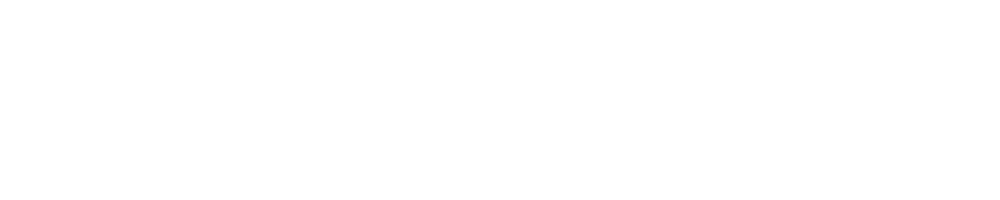

(0, 20, -0.78886688495249613)
(0, 20, -1.8421434764866149)
(0, 20, -0.48467854293033791)
(0, 20, 0.43996105359042242)
(0, 20, 0.53441550820487016)
(0, 20, 0.2383120883588791)
(0, 20, 0.75705843306139631)
(0, 20, 0.37474130525393057)
(1, 20, 0.5523772587179091)
(1, 20, 0.55298992294749194)
(1, 20, 0.66654196030152113)
(1, 20, -0.18224926911148173)
(1, 20, 0.6760055921844178)
(1, 20, 0.29419030535567742)
(1, 20, 0.30494195426464366)
(1, 20, 0.0)
(2, 20, -1.9776474233805637)
(2, 20, 0.66338913414745615)
(2, 20, 0.62468519529445621)
(2, 20, 0.62984590650015948)
(2, 20, 0.085063347918843471)
(2, 20, 0.78359278776674512)
(2, 20, 0.84505021546575598)
(2, 20, 0.29432856439747007)
(3, 20, 0.46094189562465182)
(3, 20, 0.38956460168705592)
(3, 20, -0.2440876842027363)
(3, 20, 0.75863058677858308)
(3, 20, 0.90861501968507385)
(3, 20, 0.67317163652951162)
(3, 20, 0.44121869687325427)
(3, 20, -0.16536180359296251)
(4, 20, 0.79286094458762146)
(4, 20, 0.92233191075559873)
(4, 20, 0.4606254012716659)


In [154]:
nkey = len(keylist)
nangle = 8
Rhigh = [None]*nkey
top_score = [None]*nkey
cutoffs = np.round(np.arange(20,21)).astype('int')

eye_cutoff = 50

# cutoffs = (50,)
for k in (1,): #range(len(keylist)):
    Rhigh[k] = [None]*len(cutoffs)
    data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
    data[np.isnan(data)] = 0
    
    u,sigma,v = np.linalg.svd(data)
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    size = ds[keylist[k]]['stimulus_id'][()][0]
    contrast = ds[keylist[k]]['stimulus_id'][()][1]
    angle = ds[keylist[k]]['stimulus_id'][()][-1]
    
    proc[k]['u'] = u
    proc[k]['sigma'] = sigma
    proc[k]['v'] = v  
    proc[k]['pval_ret'] = pval_ret
    proc[k]['dist_ret'] = dist_ret
    proc[k]['ontarget_ret_lax'] = ontarget_ret_lax
    proc[k]['running_speed_cm_s'] = running_speed_cm_s
    proc[k]['running'] = running
    proc[k]['size'] = size
    proc[k]['contrast'] = contrast
    proc[k]['angle'] = angle
    
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        top_score[k] = np.zeros((len(cutoffs),5,8))
        for icutoff,cutoff in enumerate(cutoffs):
            Rhigh[k][icutoff] = np.zeros((5,8,cutoff))
            plt.figure(figsize=(10,2))
            for s in range(5):
                plt.subplot(1,5,s+1)
                for i in range(nangle):
                    stim_of_interest_all_contrast = k_and(angle==i,size==s,contrast>=4,running,eye_dist < np.nanpercentile(eye_dist,eye_cutoff))
                    X = (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]
                    uangle = np.unique(angle)
                    y = contrast[stim_of_interest_all_contrast] #>0

                    na = 50
                    sc = np.zeros((na,))
                    alphas = np.logspace(-2,2,na)
                    for ia,alpha in enumerate(alphas):
                        linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                        reg = linreg.fit(X,y)
                        scores = sklearn.model_selection.cross_validate(linreg,X,y)
                        pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                        sc[ia] = scores['test_score'].mean()
                    best_alpha = np.argmax(sc)
                    top_score[k][icutoff,s,i] = sc.max()
                    print((s,cutoff,top_score[k][icutoff,s,i]))
                    linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                    reg = linreg.fit(X,y)

                    Rhigh[k][icutoff][s,i] = reg.coef_

                    Xall =  (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]

                    ypred = reg.predict(Xall)

                    yactual = contrast[stim_of_interest_all_contrast]

                    plt.scatter(yactual+1*np.linspace(0,1,yactual.size),ypred,s=5)
                
#                 plt.plot(sc)
#                 plt.ylim(-1,1)

In [155]:
# plt.figure(figsize=(16,2))
for k in range(len(top_score)):
#     plt.subplot(1,len(top_score),k+1)
    if not top_score[k] is None:
#         plt.plot(top_score[k].mean(-1))
        print(str(k)+': '+str(top_score[k].mean(-1)))
#         plt.ylim((0,1))

1: [[-0.09640006  0.35809972  0.24353847  0.40283662  0.56757575]]


In [134]:
# np.save('all_ridge_regression_coefficients.npy',{'R':R})

In [142]:
def dot_product(v1,v2):
    return (v1*v2).sum()/np.sqrt((v1**2).sum())/np.sqrt((v2**2).sum())
dp = np.ones((nkey,nsize,nangle,nangle))*np.nan
for k in range(nkey):
    if not R[k] is None:
        for s in range(5):
            for i in range(nangle):
                for j in range(nangle):
                    dp[k,s,i,j] = dot_product(R[k][0][s,i],R[k][0][s,j])

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
c = -1
k = 2
for s in range(5):
    ax.scatter(R[k][c][s,:,0],R[k][c][s,:,1])

<IPython.core.display.Javascript object>

TypeError: 'NoneType' object is not subscriptable

<IPython.core.display.Javascript object>


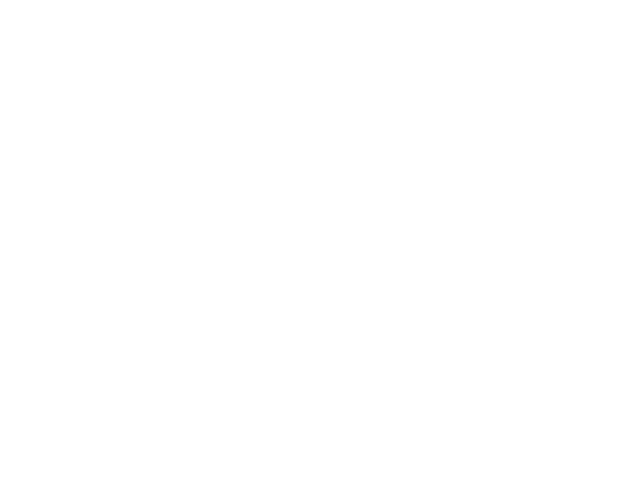

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for s in range(5):
    ax.scatter(R[1][c][s,:,0],R[1][c][s,:,1],R[1][c][s,:,2])

<IPython.core.display.Javascript object>


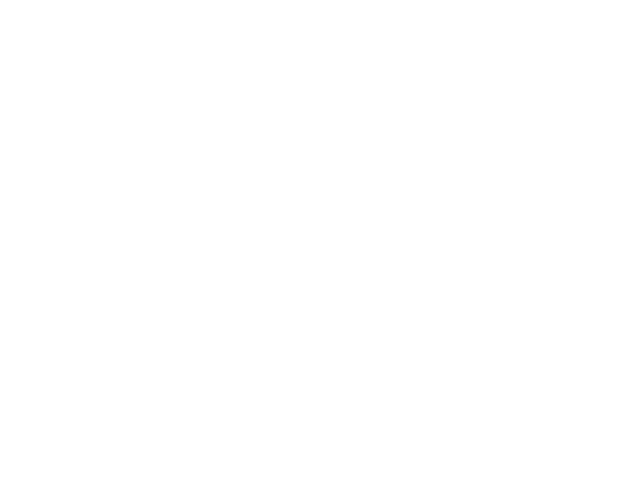

In [139]:
plt.figure()
for s in range(5):
    plt.plot(np.abs(R[1][c][s].mean(0))[:10])

<IPython.core.display.Javascript object>


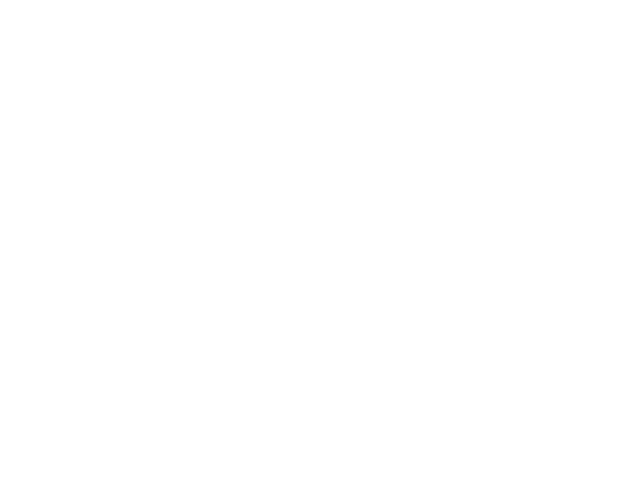

ValueError: Scalar operands are not allowed, use '*' instead

In [140]:
plt.figure()
for i in range(nangle):
    plt.plot(u[:,:cutoffs[c]] @ R[1][c][0,i][0])

<IPython.core.display.Javascript object>


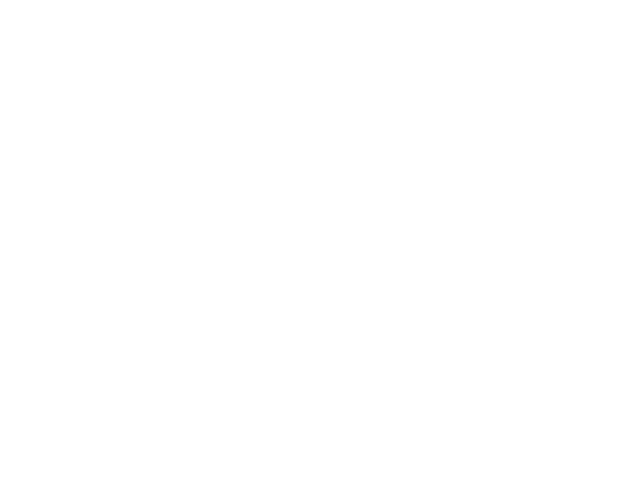

In [143]:
plt.figure()
for s in range(5):
    plt.subplot(1,5,s+1)
    plt.imshow(dp[1,s],vmin=0,vmax=1)

In [214]:
plt.close('all')

<IPython.core.display.Javascript object>


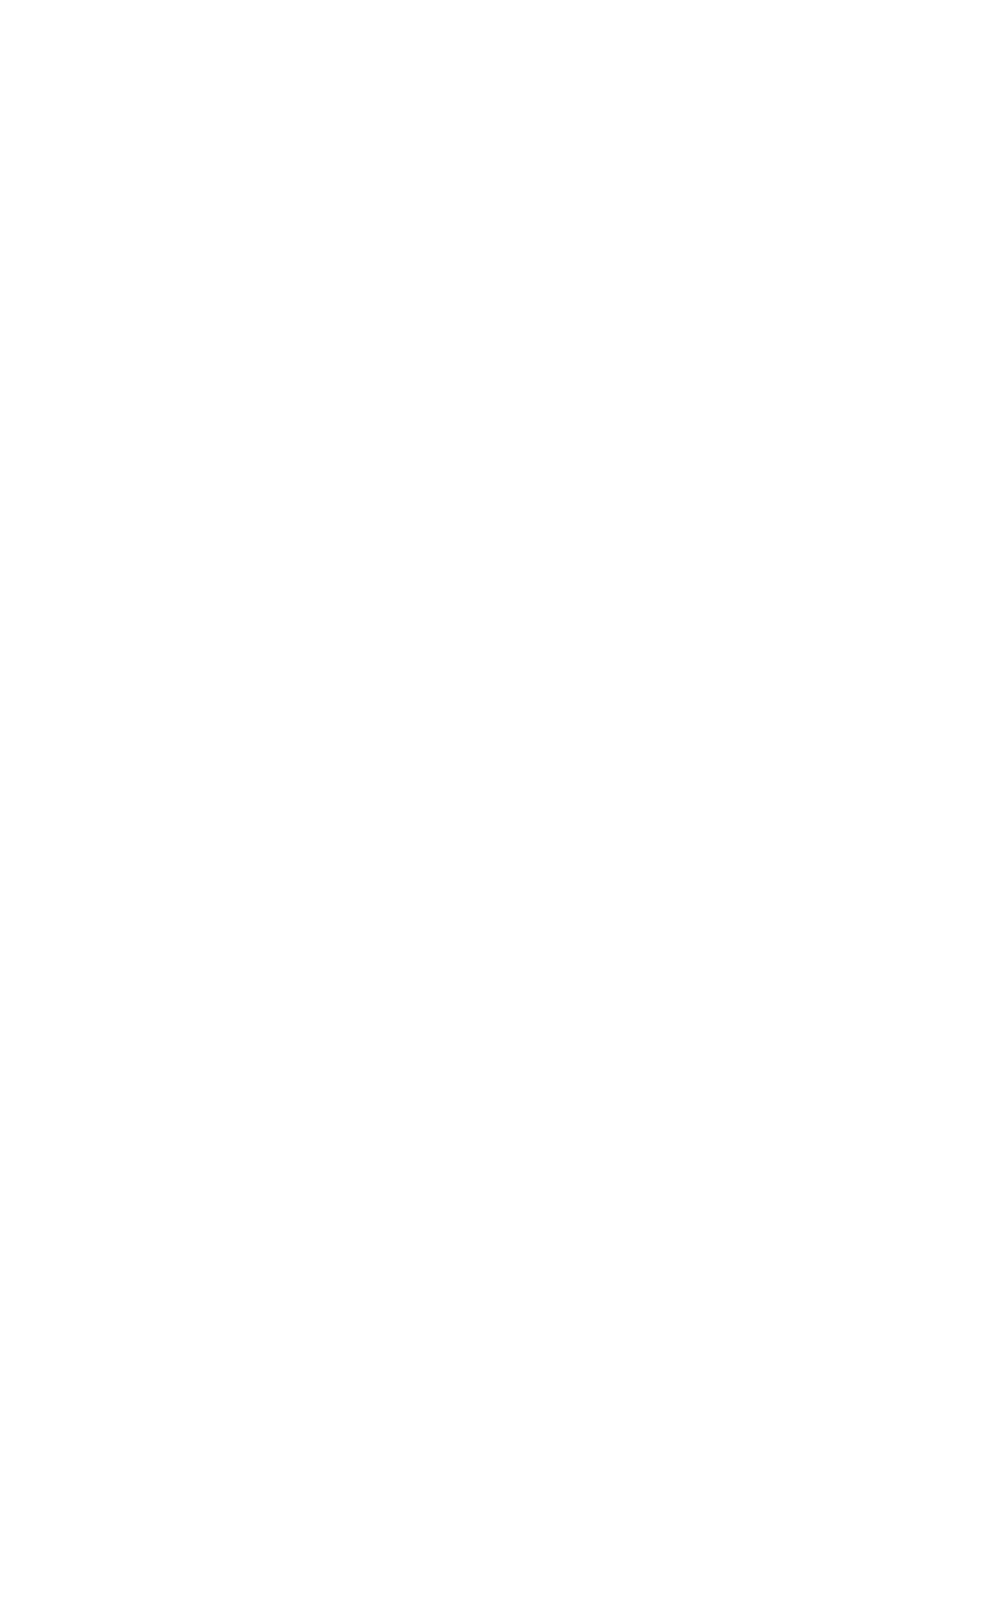

In [145]:
k = 1

size = proc[k]['size']
contrast = proc[k]['contrast']
angle = proc[k]['angle']
v = proc[k]['v']

c = -1
s = 0
a = 0
x = (0.5*(R[k][c][s,a] + R[k][c][s,a+4]) @ v[:cutoffs[c]])
s = 0
a = 2
y = (0.5*(R[k][c][s,a] + R[k][c][s,a+4]) @ v[:cutoffs[c]])

fig = plt.figure(figsize=(10,16))
for s in range(5):
    for a in range(8):
        ax = plt.subplot(8,5,a*5+s+1)#,projection='3d')
#         ax.view_init(0, 45)
        for c in range(6):
            lkat = k_and(contrast==c,size==s,angle==a)
            ax.scatter(x[lkat],y[lkat])#,z[lkat])
        ax.set_xlim(-0.03,0.03)
        ax.set_ylim(-0.03,0.03)

<IPython.core.display.Javascript object>


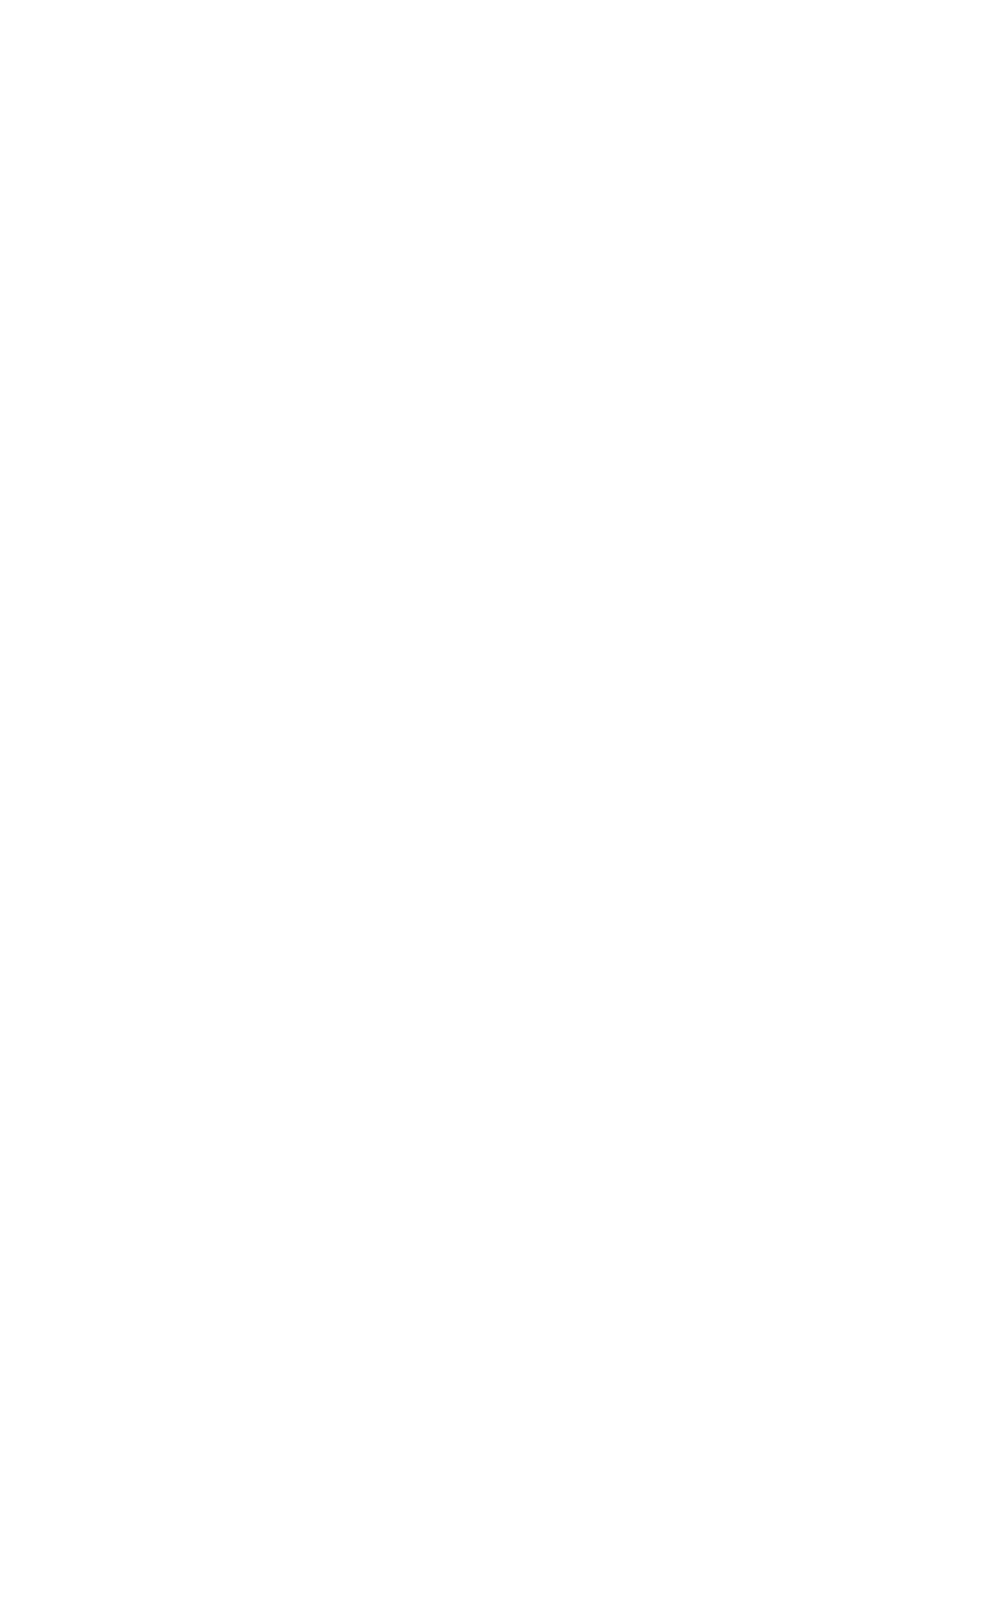

In [146]:
c = 0
s = -1
a = 0
x = (0.5*(R[k][c][s,a] + R[k][c][s,a+4]) @ v[:cutoffs[c]])
s = -1
a = 2
y = (0.5*(R[k][c][s,a] + R[k][c][s,a+4]) @ v[:cutoffs[c]])

fig = plt.figure(figsize=(10,16))
for s in range(5):
    for a in range(8):
        ax = plt.subplot(8,5,a*5+s+1)#,projection='3d')
#         ax.view_init(0, 45)
        for c in range(6):
            lkat = k_and(contrast==c,size==s,angle==a)
            ax.scatter(x[lkat],y[lkat])#,z[lkat])
        ax.set_xlim(-0.04,0.04)
        ax.set_ylim(-0.04,0.04)

<IPython.core.display.Javascript object>


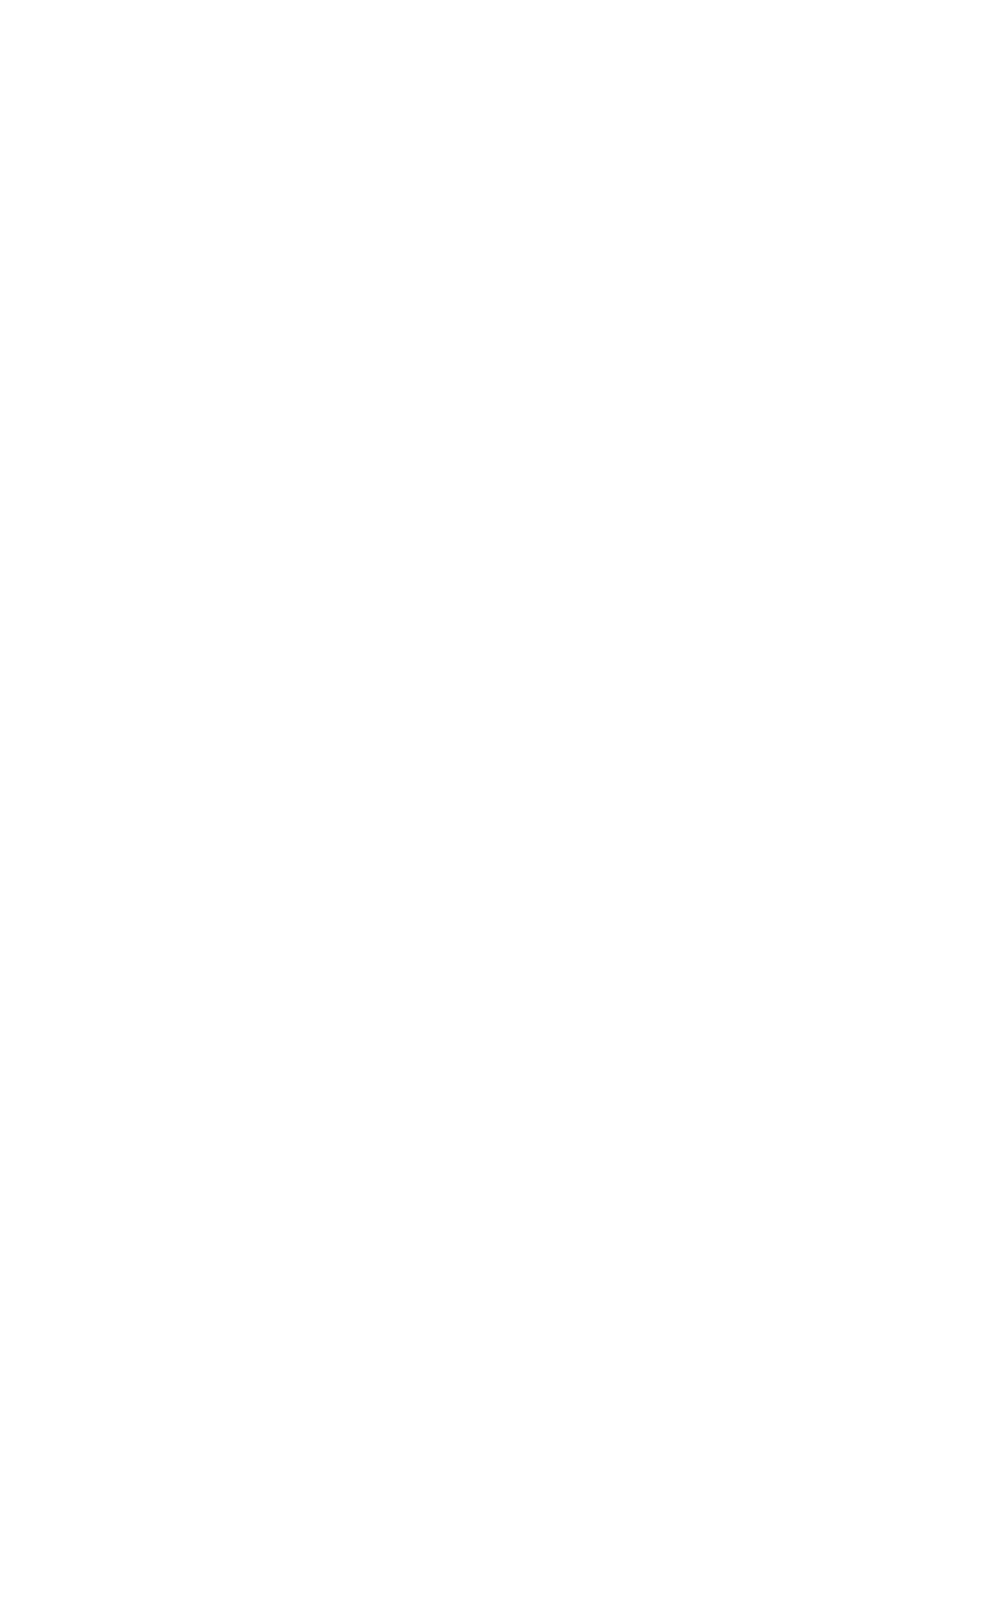

In [151]:
for k in (1,): #2,7):
    colors = plt.cm.viridis(np.linspace(0,1,6))

    v = proc[k]['v']
    contrast = proc[k]['contrast']
    size = proc[k]['size']
    angle = proc[k]['angle']

    icutoff = 0

    s = -1
    a = 0
    x = (R[k][icutoff][s,:].mean(0) @ v[:cutoffs[icutoff]])

    s = -1
    a = 2
    y = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

    s = 0
    a = 2
    z = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

    fig = plt.figure(figsize=(10,16))
    for a in range(8):
        s = -1
        y = (R[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
        for s in range(5):
#             y = (R[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
            ax = plt.subplot(8,5,a*5+s+1) #,projection='3d')
    #         ax.view_init(0, 0)
            for c in range(6):
                lkat = k_and(contrast==c,size==s,angle==a)
                ax.scatter(y[lkat],z[lkat],s=5,c=colors[c],alpha=0.2)
                ax.scatter(y[lkat].mean(),z[lkat].mean(),s=25,c=colors[c])
    #         ax.set_xlim(-0.03,0.03)
    #         ax.set_ylim(-0.03,0.03)
    #         ax.set_zlim(-0.03,0.03)

<IPython.core.display.Javascript object>


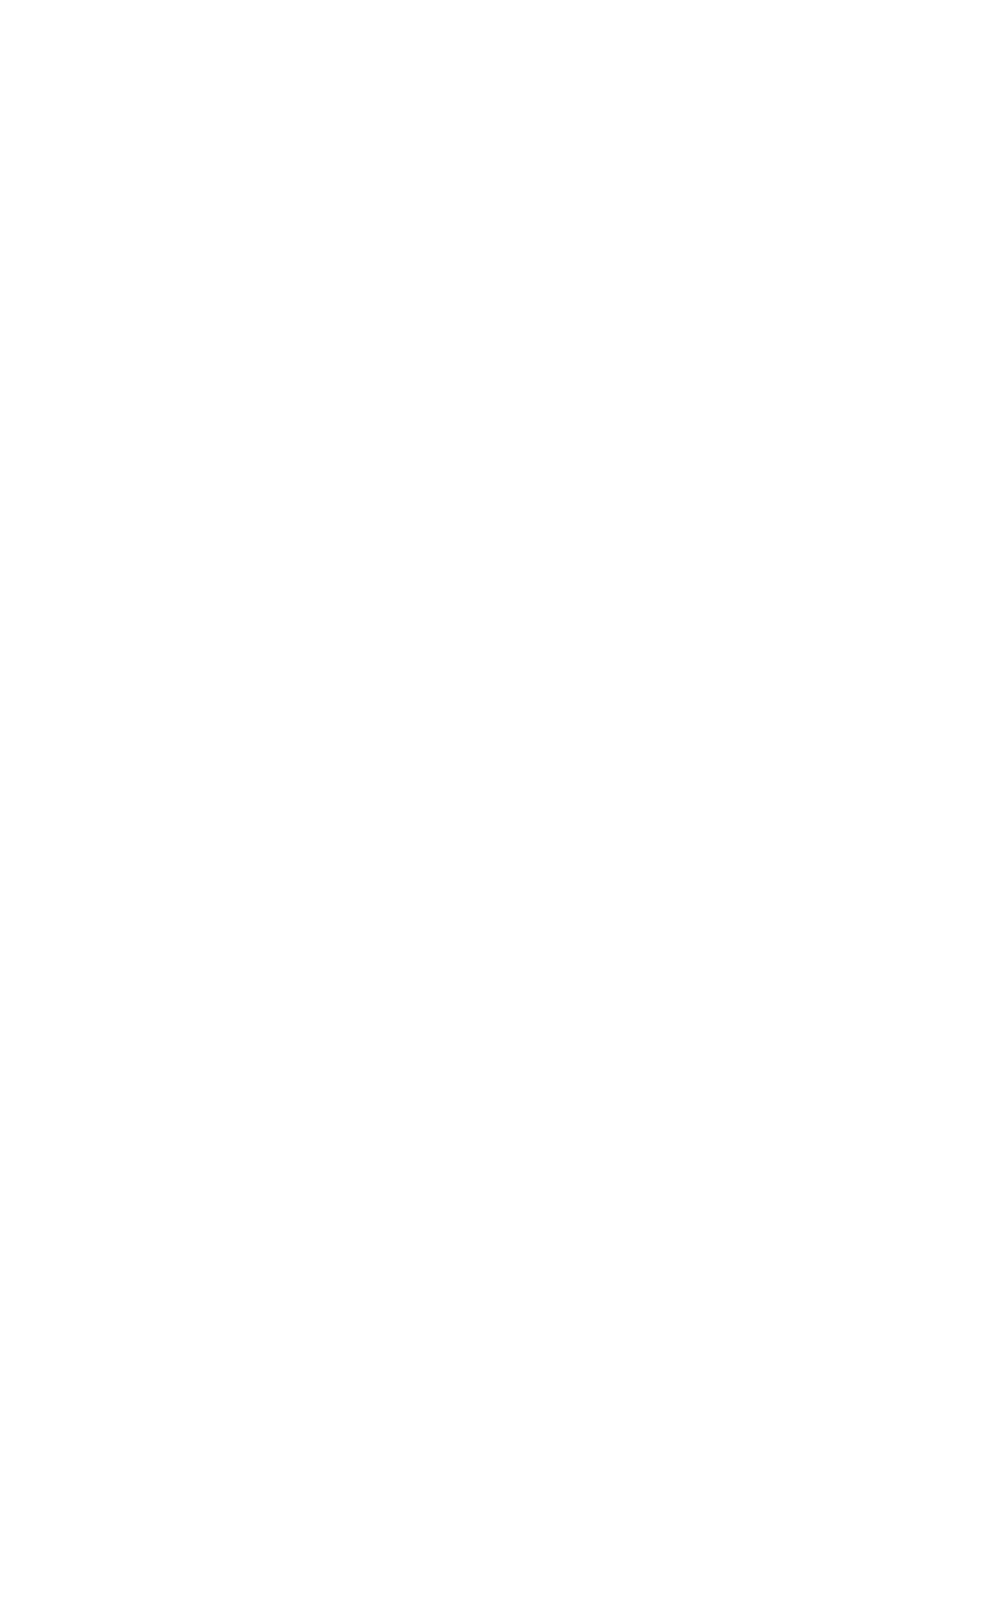

/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice.
/home/mossing/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [158]:
# x axis: low contrast coding dimension
# y axis: high contrast coding dimension
# by size and angle
for k in (1,): #2,7):
    colors = plt.cm.viridis(np.linspace(0,1,6))

    v = proc[k]['v']
    contrast = proc[k]['contrast']
    size = proc[k]['size']
    angle = proc[k]['angle']

    icutoff = 0

    s = -1
    a = 0
    x = (R[k][icutoff][s,:].mean(0) @ v[:cutoffs[icutoff]])

    s = -1
    a = 2
    y = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

    s = 0
    a = 2
    z = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

    fig = plt.figure(figsize=(10,16))
    for a in range(8):
        s = -1
        for s in range(5):
#             y = (R[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
            y = (Rlow[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
            z = (Rhigh[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
            ax = plt.subplot(8,5,a*5+s+1) #,projection='3d')
    #         ax.view_init(0, 0)
            for c in range(6):
                lkat = k_and(contrast==c,size==s,angle==a,running,eye_dist<np.nanpercentile(eye_dist,eye_cutoff))
                ax.scatter(y[lkat],z[lkat],s=5,c=colors[c],alpha=0.2)
                ax.scatter(y[lkat].mean(),z[lkat].mean(),s=25,c=colors[c])
    #         ax.set_xlim(-0.03,0.03)
    #         ax.set_ylim(-0.03,0.03)
    #         ax.set_zlim(-0.03,0.03)

<IPython.core.display.Javascript object>


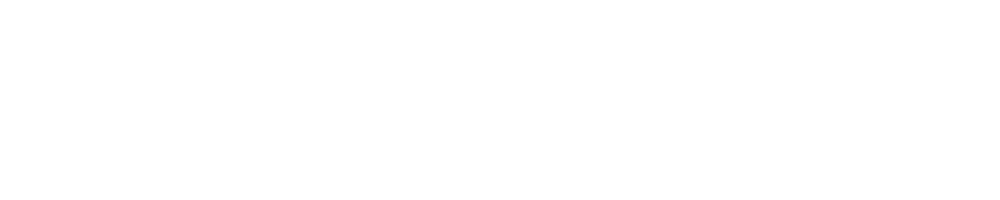

In [177]:
    # x axis: low contrast coding dimension
    # y axis: high contrast coding dimension
    # by size and angle
    for k in (1,): #2,7):
        colors = plt.cm.viridis(np.linspace(0,1,6))

        v = proc[k]['v']
        contrast = proc[k]['contrast']
        size = proc[k]['size']
        angle = proc[k]['angle']

        icutoff = 0

        s = -1
        a = 0
        x = (R[k][icutoff][s,:].mean(0) @ v[:cutoffs[icutoff]])

        s = -1
        a = 2
        y = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

        s = 0
        a = 2
        z = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

        fig = plt.figure(figsize=(10,2))
        s = -1
        
        whichangle = np.zeros((8,1400),dtype='bool')
        for i,theta in enumerate(angle):
            whichangle[theta,i] = 1
        
        for s in range(5):
#             y = (R[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
            y = (Rlow[k][icutoff][s,:] @ v[:cutoffs[icutoff]]).mean(0)
            z = (Rhigh[k][icutoff][s,:] @ v[:cutoffs[icutoff]]).mean(0)
            ax = plt.subplot(1,5,s+1) #,projection='3d')
    #         ax.view_init(0, 0)
            for c in range(6):
                lkat = k_and(contrast==c,size==s,running,eye_dist<np.nanpercentile(eye_dist,eye_cutoff))
                ax.scatter(y[lkat],z[lkat],s=5,c=colors[c],alpha=0.5)
                ax.scatter(y[lkat].mean(),z[lkat].mean(),s=25,c=colors[c])

<IPython.core.display.Javascript object>


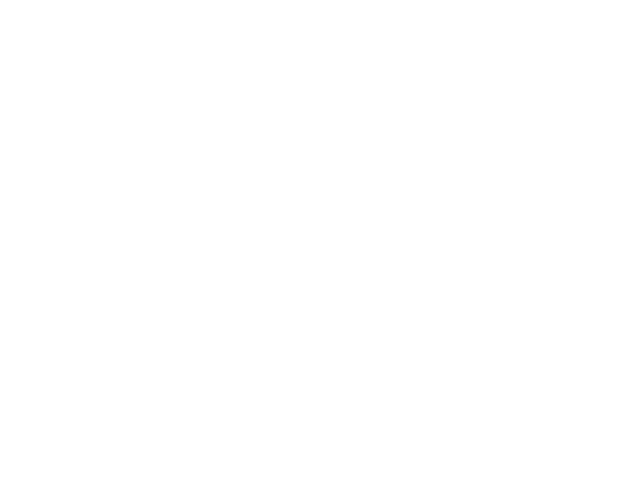

In [186]:
plt.figure()
plt.imshow((Rhigh[k][icutoff][s,:] @ v[:cutoffs[icutoff]])[:,k_and(contrast==5,s==4)])

In [179]:
(Rlow[k][icutoff][s,:] @ v[:cutoffs[icutoff]])[whichangle].shape

(1400,)

In [165]:
(Rlow[k][icutoff][s,:] @ v[:cutoffs[icutoff]]).shape

(8, 1400)

In [ ]:
nkey = len(keylist)
nangle = 8
R = [None]*nkey
top_score = [None]*nkey
cutoffs = np.round(np.arange(20,21)).astype('int')
# cutoffs = (50,)
for k in (1,): #range(len(keylist)):
    R[k] = [None]*len(cutoffs)
    data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
    data[np.isnan(data)] = 0
    
    u,sigma,v = np.linalg.svd(data)
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    size = ds[keylist[k]]['stimulus_id'][()][0]
    contrast = ds[keylist[k]]['stimulus_id'][()][1]
    angle = ds[keylist[k]]['stimulus_id'][()][-1]
    
    proc[k]['u'] = u
    proc[k]['sigma'] = sigma
    proc[k]['v'] = v  
    proc[k]['pval_ret'] = pval_ret
    proc[k]['dist_ret'] = dist_ret
    proc[k]['ontarget_ret_lax'] = ontarget_ret_lax
    proc[k]['running_speed_cm_s'] = running_speed_cm_s
    proc[k]['running'] = running
    proc[k]['size'] = size
    proc[k]['contrast'] = contrast
    proc[k]['angle'] = angle
    
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        top_score[k] = np.zeros((len(cutoffs),5,8))
        for icutoff,cutoff in enumerate(cutoffs):
            R[k][icutoff] = np.zeros((5,8,cutoff))
            plt.figure(figsize=(10,2))
            for s in range(5):
                plt.subplot(1,5,s+1)
                for i in range(nangle):
                    stim_of_interest_all_contrast = k_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running,eye_dist < np.nanpercentile(eye_dist,50))
                    X = (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]
                    uangle = np.unique(angle)
                    y = contrast[stim_of_interest_all_contrast] #>0

                    na = 50
                    sc = np.zeros((na,))
                    alphas = np.logspace(-2,2,na)
                    for ia,alpha in enumerate(alphas):
                        linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                        reg = linreg.fit(X,y)
                        scores = sklearn.model_selection.cross_validate(linreg,X,y)
                        pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                        sc[ia] = scores['test_score'].mean()
                    best_alpha = np.argmax(sc)
                    top_score[k][icutoff,s,i] = sc.max()
                    print((s,cutoff,top_score[k][icutoff,s,i]))
                    linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                    reg = linreg.fit(X,y)

                    R[k][icutoff][s,i] = reg.coef_

                    Xall =  (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]

                    ypred = reg.predict(Xall)

                    yactual = contrast[stim_of_interest_all_contrast]

                    plt.scatter(yactual+1*np.linspace(0,1,yactual.size),ypred,s=5)
                
#                 plt.plot(sc)
#                 plt.ylim(-1,1)
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
lda.fit()

In [149]:
k = 2

colors = plt.cm.viridis(np.linspace(0,1,6))

v = proc[k]['v']
contrast = proc[k]['contrast']
size = proc[k]['size']
angle = proc[k]['angle']

icutoff = 0

s = -1
a = 0
x = (R[k][icutoff][s,:].mean(0) @ v[:cutoffs[icutoff]])

s = -1
a = 2
y = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

s = 0
a = 2
z = (0.5*(R[k][icutoff][s,a] + R[k][icutoff][s,a+4]) @ v[:cutoffs[icutoff]])

fig = plt.figure(figsize=(10,16))
for a in range(8):
    for s in range(5):
        y = (R[k][icutoff][s,a] @ v[:cutoffs[icutoff]])
        ax = plt.subplot(8,5,a*5+s+1) #,projection='3d')
#         ax.view_init(0, 0)
        for c in range(6):
            lkat = k_and(contrast==c,size==s,angle==a)
            ax.scatter(y[lkat],z[lkat],s=5,c=colors[c],alpha=0.2)
            ax.scatter(y[lkat].mean(),z[lkat].mean(),s=25,c=colors[c])

TypeError: 'NoneType' object is not subscriptable

<IPython.core.display.Javascript object>


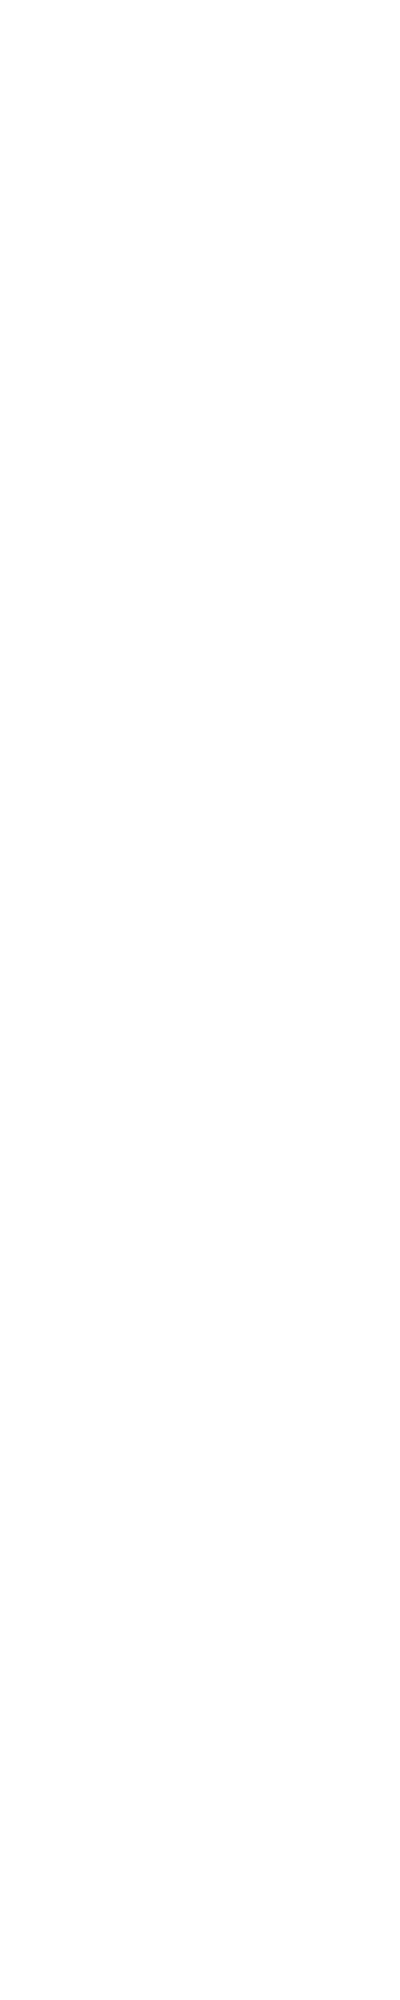

In [150]:
plt.figure(figsize=(4,20))
c = -1
k = 1
distance = dist_ret[ontarget_ret_lax]
for s in range(5):
    regression_weight = (u[:,:cutoffs[c]] @ R[k][c][s].mean(0))[ontarget_ret_lax]
    plt.subplot(5,1,s+1)
    plt.scatter(distance,regression_weight,s=5)
    binmean,binedge,_ = sst.binned_statistic(distance,regression_weight)
    binstd,_,_ = sst.binned_statistic(dist_ret[ontarget_ret_lax],regression_weight,statistic=sst.sem)
    plt.errorbar(0.5*(binedge[:-1]+binedge[1:]),binmean,binstd,c='r')
    plt.plot(0.5*(binedge[:-1]+binedge[1:]),np.zeros_like(binmean),c='k')
    plt.ylim((-0.03,0.03))

<IPython.core.display.Javascript object>


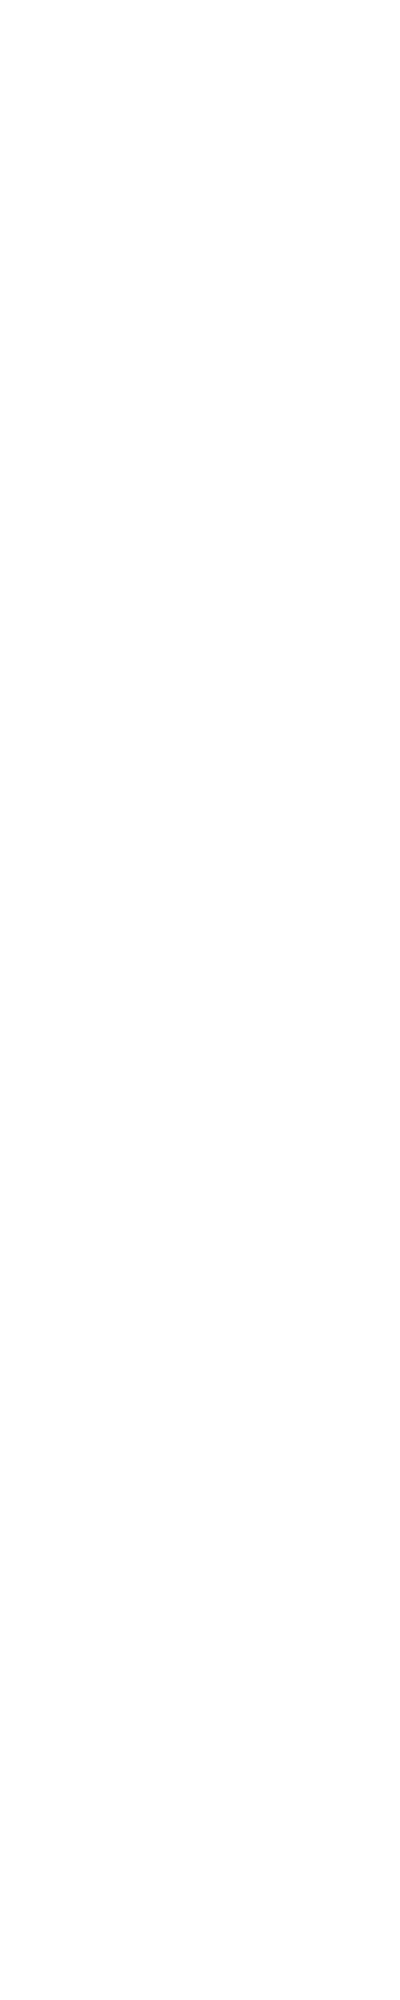

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mossing/anaconda3/lib/python3.6/site-packages/matp

In [164]:
plt.figure(figsize=(4,20))
icutoff = -1
k = 1
distance = dist_ret[ontarget_ret_lax]
for s in range(5):
    regression_weight = (u[:,:cutoffs[icutoff]] @ Rlow[k][icutoff][s].mean(0))[ontarget_ret_lax]
    plt.subplot(5,1,s+1)
    plt.scatter(distance,regression_weight,s=5)
    binmean,binedge,_ = sst.binned_statistic(distance,regression_weight)
    binstd,_,_ = sst.binned_statistic(dist_ret[ontarget_ret_lax],regression_weight,statistic=sst.sem)
    plt.errorbar(0.5*(binedge[:-1]+binedge[1:]),binmean,binstd,c='r')
    plt.plot(0.5*(binedge[:-1]+binedge[1:]),np.zeros_like(binmean),c='k')
    plt.ylim((-0.03,0.03))
for s in range(5):
    regression_weight = (u[:,:cutoffs[icutoff]] @ Rhigh[k][icutoff][s].mean(0))[ontarget_ret_lax]
    plt.subplot(5,1,s+1)
    plt.scatter(distance,regression_weight,s=5)
    binmean,binedge,_ = sst.binned_statistic(distance,regression_weight)
    binstd,_,_ = sst.binned_statistic(dist_ret[ontarget_ret_lax],regression_weight,statistic=sst.sem)
    plt.errorbar(0.5*(binedge[:-1]+binedge[1:]),binmean,binstd,c='c')
    plt.plot(0.5*(binedge[:-1]+binedge[1:]),np.zeros_like(binmean),c='k')
    plt.ylim((-0.01,0.02))

In [37]:
def k_and(*args):
    if len(args)>2:
        return np.logical_and(args[0],k_and(*args[1:]))
    else:
        return np.logical_and(args[0],args[1])

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


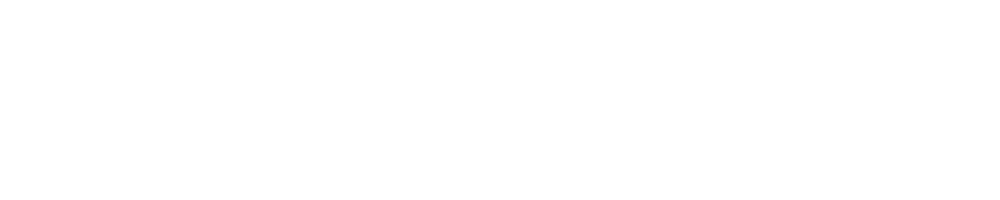

(10, 0, 0, 0.58333333333333337)
(10, 0, 0, 0.58333333333333337)
(10, 0, 0, 0.33333333333333331)
(10, 0, 0, 0.63888888888888884)
(10, 0, 0, 0.61111111111111105)
(10, 0, 0, 0.66666666666666663)
(10, 0, 0, 0.75)
(10, 0, 0, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 0, 1, 0.58333333333333337)
(10, 0, 1, 0.5)
(10, 0, 1, 0.58333333333333337)
(10, 0, 1, 0.75)
(10, 0, 1, 0.5)
(10, 0, 1, 0.41666666666666669)
(10, 0, 1, 0.66666666666666663)
(10, 0, 1, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 0, 2, 0.58333333333333337)
(10, 0, 2, 0.33333333333333331)
(10, 0, 2, 0.66666666666666663)
(10, 0, 2, 0.91666666666666663)
(10, 0, 2, 0.75)
(10, 0, 2, 0.16666666666666666)
(10, 0, 2, 0.66666666666666663)
(10, 0, 2, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 0, 3, 0.5)
(10, 0, 3, 0.75)
(10, 0, 3, 0.83333333333333337)
(10, 0, 3, 0.61111111111111105)
(10, 0, 3, 0.75)
(10, 0, 3, 0.41666666666666669)
(10, 0, 3, 0.75)
(10, 0, 3, 0.83333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 0, 4, 0.75)
(10, 0, 4, 0.91666666666666663)
(10, 0, 4, 0.75)
(10, 0, 4, 0.91666666666666663)
(10, 0, 4, 1.0)
(10, 0, 4, 0.83333333333333337)
(10, 0, 4, 0.75)
(10, 0, 4, 0.83333333333333337)
(10, 1, 0, 0.58333333333333337)
(10, 1, 0, 0.83333333333333337)
(10, 1, 0, 0.52777777777777779)
(10, 1, 0, 0.66666666666666663)
(10, 1, 0, 0.33333333333333331)
(10, 1, 0, 0.5)
(10, 1, 0, 0.72222222222222221)
(10, 1, 0, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 1, 1, 0.58333333333333337)
(10, 1, 1, 0.91666666666666663)
(10, 1, 1, 0.58333333333333337)
(10, 1, 1, 0.58333333333333337)
(10, 1, 1, 0.58333333333333337)
(10, 1, 1, 0.5)
(10, 1, 1, 0.66666666666666663)
(10, 1, 1, 0.5)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 1, 2, 0.75)
(10, 1, 2, 0.55555555555555547)
(10, 1, 2, 0.66666666666666663)
(10, 1, 2, 0.66666666666666663)
(10, 1, 2, 0.91666666666666663)
(10, 1, 2, 0.83333333333333337)
(10, 1, 2, 0.75)
(10, 1, 2, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 1, 3, 0.58333333333333337)
(10, 1, 3, 0.75)
(10, 1, 3, 0.83333333333333337)
(10, 1, 3, 0.91666666666666663)
(10, 1, 3, 0.83333333333333337)
(10, 1, 3, 0.75)
(10, 1, 3, 1.0)
(10, 1, 3, 0.5)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 1, 4, 1.0)
(10, 1, 4, 0.91666666666666663)
(10, 1, 4, 1.0)
(10, 1, 4, 0.91666666666666663)
(10, 1, 4, 0.66666666666666663)
(10, 1, 4, 0.83333333333333337)
(10, 1, 4, 0.83333333333333337)
(10, 1, 4, 0.91666666666666663)
(10, 2, 0, 0.41666666666666669)
(10, 2, 0, 0.5)
(10, 2, 0, 0.66666666666666663)
(10, 2, 0, 0.75)
(10, 2, 0, 0.91666666666666663)
(10, 2, 0, 0.66666666666666663)
(10, 2, 0, 0.5)
(10, 2, 0, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 2, 1, 0.83333333333333337)
(10, 2, 1, 0.66666666666666663)
(10, 2, 1, 1.0)
(10, 2, 1, 0.58333333333333337)
(10, 2, 1, 0.66666666666666663)
(10, 2, 1, 0.5)
(10, 2, 1, 0.91666666666666663)
(10, 2, 1, 0.58333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 2, 2, 0.83333333333333337)
(10, 2, 2, 1.0)
(10, 2, 2, 0.83333333333333337)
(10, 2, 2, 0.91666666666666663)
(10, 2, 2, 0.66666666666666663)
(10, 2, 2, 0.66666666666666663)
(10, 2, 2, 0.83333333333333337)
(10, 2, 2, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 2, 3, 0.83333333333333337)
(10, 2, 3, 0.91666666666666663)
(10, 2, 3, 1.0)
(10, 2, 3, 0.83333333333333337)
(10, 2, 3, 0.91666666666666663)
(10, 2, 3, 0.91666666666666663)
(10, 2, 3, 0.83333333333333337)
(10, 2, 3, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 2, 4, 0.91666666666666663)
(10, 2, 4, 1.0)
(10, 2, 4, 1.0)
(10, 2, 4, 1.0)
(10, 2, 4, 0.75)
(10, 2, 4, 0.91666666666666663)
(10, 2, 4, 0.91666666666666663)
(10, 2, 4, 0.91666666666666663)
(10, 3, 0, 0.66666666666666663)
(10, 3, 0, 0.83333333333333337)
(10, 3, 0, 0.75)
(10, 3, 0, 0.5)
(10, 3, 0, 0.75)
(10, 3, 0, 0.61111111111111105)
(10, 3, 0, 0.75)
(10, 3, 0, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 3, 1, 1.0)
(10, 3, 1, 1.0)
(10, 3, 1, 0.75)
(10, 3, 1, 1.0)
(10, 3, 1, 1.0)
(10, 3, 1, 1.0)
(10, 3, 1, 0.91666666666666663)
(10, 3, 1, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 3, 2, 1.0)
(10, 3, 2, 1.0)
(10, 3, 2, 0.58333333333333337)
(10, 3, 2, 0.41666666666666669)
(10, 3, 2, 0.58333333333333337)
(10, 3, 2, 0.66666666666666663)
(10, 3, 2, 0.91666666666666663)
(10, 3, 2, 0.88888888888888884)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 3, 3, 0.91666666666666663)
(10, 3, 3, 1.0)
(10, 3, 3, 0.75)
(10, 3, 3, 1.0)
(10, 3, 3, 1.0)
(10, 3, 3, 1.0)
(10, 3, 3, 0.91666666666666663)
(10, 3, 3, 0.88888888888888884)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 3, 4, 0.91666666666666663)
(10, 3, 4, 0.83333333333333337)
(10, 3, 4, 1.0)
(10, 3, 4, 0.83333333333333337)
(10, 3, 4, 0.91666666666666663)
(10, 3, 4, 0.91666666666666663)
(10, 3, 4, 1.0)
(10, 3, 4, 1.0)
(10, 4, 0, 1.0)
(10, 4, 0, 0.91666666666666663)
(10, 4, 0, 1.0)
(10, 4, 0, 1.0)
(10, 4, 0, 1.0)
(10, 4, 0, 1.0)
(10, 4, 0, 0.83333333333333337)
(10, 4, 0, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 4, 1, 0.91666666666666663)
(10, 4, 1, 0.83333333333333337)
(10, 4, 1, 0.91666666666666663)
(10, 4, 1, 1.0)
(10, 4, 1, 0.91666666666666663)
(10, 4, 1, 1.0)
(10, 4, 1, 1.0)
(10, 4, 1, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 4, 2, 0.25)
(10, 4, 2, 0.66666666666666663)
(10, 4, 2, 0.75)
(10, 4, 2, 0.66666666666666663)
(10, 4, 2, 0.83333333333333337)
(10, 4, 2, 0.58333333333333337)
(10, 4, 2, 0.66666666666666663)
(10, 4, 2, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 4, 3, 1.0)
(10, 4, 3, 1.0)
(10, 4, 3, 1.0)
(10, 4, 3, 1.0)
(10, 4, 3, 1.0)
(10, 4, 3, 1.0)
(10, 4, 3, 1.0)
(10, 4, 3, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(10, 4, 4, 1.0)
(10, 4, 4, 1.0)
(10, 4, 4, 1.0)
(10, 4, 4, 1.0)
(10, 4, 4, 1.0)
(10, 4, 4, 1.0)
(10, 4, 4, 0.91666666666666663)
(10, 4, 4, 1.0)


<IPython.core.display.Javascript object>


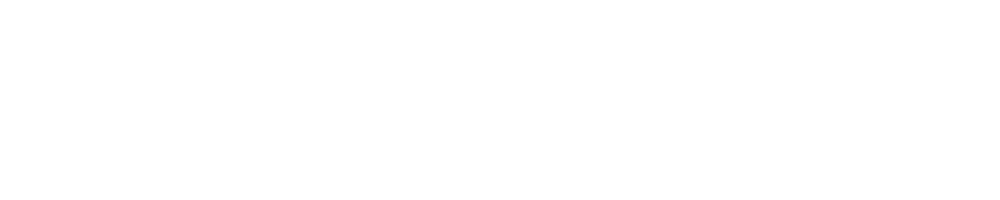

(30, 0, 0, 0.58333333333333337)
(30, 0, 0, 0.75)
(30, 0, 0, 0.5)
(30, 0, 0, 0.80555555555555547)
(30, 0, 0, 0.61111111111111105)
(30, 0, 0, 0.83333333333333337)
(30, 0, 0, 0.41666666666666669)
(30, 0, 0, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 0, 1, 0.5)
(30, 0, 1, 0.33333333333333331)
(30, 0, 1, 0.58333333333333337)
(30, 0, 1, 0.58333333333333337)
(30, 0, 1, 0.25)
(30, 0, 1, 0.41666666666666669)
(30, 0, 1, 0.66666666666666663)
(30, 0, 1, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 0, 2, 0.58333333333333337)
(30, 0, 2, 0.33333333333333331)
(30, 0, 2, 0.66666666666666663)
(30, 0, 2, 0.52777777777777779)
(30, 0, 2, 0.5)
(30, 0, 2, 0.16666666666666666)
(30, 0, 2, 0.5)
(30, 0, 2, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 0, 3, 0.5)
(30, 0, 3, 0.66666666666666663)
(30, 0, 3, 0.66666666666666663)
(30, 0, 3, 0.52777777777777779)
(30, 0, 3, 0.66666666666666663)
(30, 0, 3, 0.16666666666666666)
(30, 0, 3, 0.83333333333333337)
(30, 0, 3, 0.83333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 0, 4, 0.58333333333333337)
(30, 0, 4, 0.83333333333333337)
(30, 0, 4, 0.66666666666666663)
(30, 0, 4, 0.91666666666666663)
(30, 0, 4, 0.83333333333333337)
(30, 0, 4, 0.91666666666666663)
(30, 0, 4, 0.91666666666666663)
(30, 0, 4, 0.75)
(30, 1, 0, 0.58333333333333337)
(30, 1, 0, 0.75)
(30, 1, 0, 0.61111111111111105)
(30, 1, 0, 0.91666666666666663)
(30, 1, 0, 0.41666666666666669)
(30, 1, 0, 0.41666666666666669)
(30, 1, 0, 0.61111111111111105)
(30, 1, 0, 0.58333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 1, 1, 0.58333333333333337)
(30, 1, 1, 0.75)
(30, 1, 1, 0.66666666666666663)
(30, 1, 1, 0.33333333333333331)
(30, 1, 1, 0.5)
(30, 1, 1, 0.41666666666666669)
(30, 1, 1, 0.58333333333333337)
(30, 1, 1, 0.33333333333333331)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 1, 2, 0.58333333333333337)
(30, 1, 2, 0.80555555555555547)
(30, 1, 2, 0.5)
(30, 1, 2, 0.83333333333333337)
(30, 1, 2, 0.83333333333333337)
(30, 1, 2, 0.83333333333333337)
(30, 1, 2, 0.66666666666666663)
(30, 1, 2, 0.5)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 1, 3, 0.66666666666666663)
(30, 1, 3, 0.75)
(30, 1, 3, 0.75)
(30, 1, 3, 0.83333333333333337)
(30, 1, 3, 0.91666666666666663)
(30, 1, 3, 0.58333333333333337)
(30, 1, 3, 0.91666666666666663)
(30, 1, 3, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 1, 4, 1.0)
(30, 1, 4, 0.75)
(30, 1, 4, 1.0)
(30, 1, 4, 0.75)
(30, 1, 4, 0.75)
(30, 1, 4, 0.75)
(30, 1, 4, 0.83333333333333337)
(30, 1, 4, 0.75)
(30, 2, 0, 0.5)
(30, 2, 0, 0.75)
(30, 2, 0, 0.44444444444444442)
(30, 2, 0, 0.58333333333333337)
(30, 2, 0, 0.66666666666666663)
(30, 2, 0, 0.66666666666666663)
(30, 2, 0, 0.75)
(30, 2, 0, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 2, 1, 0.91666666666666663)
(30, 2, 1, 0.5)
(30, 2, 1, 0.75)
(30, 2, 1, 0.58333333333333337)
(30, 2, 1, 0.75)
(30, 2, 1, 0.41666666666666669)
(30, 2, 1, 0.83333333333333337)
(30, 2, 1, 0.83333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 2, 2, 0.83333333333333337)
(30, 2, 2, 0.91666666666666663)
(30, 2, 2, 0.75)
(30, 2, 2, 0.91666666666666663)
(30, 2, 2, 0.75)
(30, 2, 2, 0.5)
(30, 2, 2, 0.91666666666666663)
(30, 2, 2, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 2, 3, 0.66666666666666663)
(30, 2, 3, 1.0)
(30, 2, 3, 0.91666666666666663)
(30, 2, 3, 0.83333333333333337)
(30, 2, 3, 0.91666666666666663)
(30, 2, 3, 0.75)
(30, 2, 3, 0.83333333333333337)
(30, 2, 3, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 2, 4, 0.66666666666666663)
(30, 2, 4, 1.0)
(30, 2, 4, 1.0)
(30, 2, 4, 0.83333333333333337)
(30, 2, 4, 0.66666666666666663)
(30, 2, 4, 0.83333333333333337)
(30, 2, 4, 1.0)
(30, 2, 4, 0.83333333333333337)
(30, 3, 0, 0.75)
(30, 3, 0, 0.91666666666666663)
(30, 3, 0, 0.41666666666666669)
(30, 3, 0, 0.66666666666666663)
(30, 3, 0, 0.66666666666666663)
(30, 3, 0, 0.61111111111111105)
(30, 3, 0, 0.66666666666666663)
(30, 3, 0, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 3, 1, 0.91666666666666663)
(30, 3, 1, 1.0)
(30, 3, 1, 0.66666666666666663)
(30, 3, 1, 1.0)
(30, 3, 1, 1.0)
(30, 3, 1, 1.0)
(30, 3, 1, 1.0)
(30, 3, 1, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 3, 2, 0.83333333333333337)
(30, 3, 2, 0.75)
(30, 3, 2, 0.75)
(30, 3, 2, 0.41666666666666669)
(30, 3, 2, 0.58333333333333337)
(30, 3, 2, 0.58333333333333337)
(30, 3, 2, 0.91666666666666663)
(30, 3, 2, 0.83333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 3, 3, 0.83333333333333337)
(30, 3, 3, 1.0)
(30, 3, 3, 1.0)
(30, 3, 3, 1.0)
(30, 3, 3, 0.91666666666666663)
(30, 3, 3, 1.0)
(30, 3, 3, 0.91666666666666663)
(30, 3, 3, 0.88888888888888884)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 3, 4, 0.75)
(30, 3, 4, 0.83333333333333337)
(30, 3, 4, 1.0)
(30, 3, 4, 0.75)
(30, 3, 4, 0.91666666666666663)
(30, 3, 4, 0.91666666666666663)
(30, 3, 4, 1.0)
(30, 3, 4, 0.91666666666666663)
(30, 4, 0, 0.91666666666666663)
(30, 4, 0, 0.66666666666666663)
(30, 4, 0, 1.0)
(30, 4, 0, 1.0)
(30, 4, 0, 1.0)
(30, 4, 0, 0.75)
(30, 4, 0, 0.66666666666666663)
(30, 4, 0, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 4, 1, 0.91666666666666663)
(30, 4, 1, 0.83333333333333337)
(30, 4, 1, 0.91666666666666663)
(30, 4, 1, 1.0)
(30, 4, 1, 0.91666666666666663)
(30, 4, 1, 0.91666666666666663)
(30, 4, 1, 1.0)
(30, 4, 1, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 4, 2, 0.41666666666666669)
(30, 4, 2, 0.91666666666666663)
(30, 4, 2, 0.75)
(30, 4, 2, 0.58333333333333337)
(30, 4, 2, 0.75)
(30, 4, 2, 0.58333333333333337)
(30, 4, 2, 0.83333333333333337)
(30, 4, 2, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 4, 3, 1.0)
(30, 4, 3, 1.0)
(30, 4, 3, 1.0)
(30, 4, 3, 1.0)
(30, 4, 3, 1.0)
(30, 4, 3, 0.91666666666666663)
(30, 4, 3, 1.0)
(30, 4, 3, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(30, 4, 4, 1.0)
(30, 4, 4, 1.0)
(30, 4, 4, 1.0)
(30, 4, 4, 1.0)
(30, 4, 4, 1.0)
(30, 4, 4, 1.0)
(30, 4, 4, 0.91666666666666663)
(30, 4, 4, 1.0)


<IPython.core.display.Javascript object>


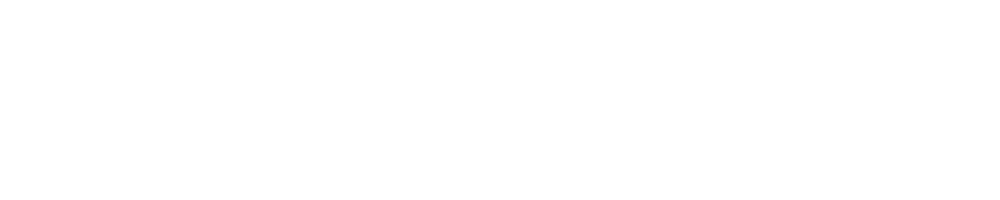

(50, 0, 0, 0.41666666666666669)
(50, 0, 0, 0.58333333333333337)
(50, 0, 0, 0.5)
(50, 0, 0, 0.80555555555555547)
(50, 0, 0, 0.61111111111111105)
(50, 0, 0, 0.83333333333333337)
(50, 0, 0, 0.33333333333333331)
(50, 0, 0, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 0, 1, 0.41666666666666669)
(50, 0, 1, 0.33333333333333331)
(50, 0, 1, 0.41666666666666669)
(50, 0, 1, 0.58333333333333337)
(50, 0, 1, 0.25)
(50, 0, 1, 0.33333333333333331)
(50, 0, 1, 0.66666666666666663)
(50, 0, 1, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 0, 2, 0.66666666666666663)
(50, 0, 2, 0.41666666666666669)
(50, 0, 2, 0.41666666666666669)
(50, 0, 2, 0.63888888888888884)
(50, 0, 2, 0.58333333333333337)
(50, 0, 2, 0.16666666666666666)
(50, 0, 2, 0.66666666666666663)
(50, 0, 2, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 0, 3, 0.41666666666666669)
(50, 0, 3, 0.5)
(50, 0, 3, 0.75)
(50, 0, 3, 0.44444444444444442)
(50, 0, 3, 0.75)
(50, 0, 3, 0.25)
(50, 0, 3, 0.83333333333333337)
(50, 0, 3, 0.83333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 0, 4, 0.58333333333333337)
(50, 0, 4, 0.75)
(50, 0, 4, 0.66666666666666663)
(50, 0, 4, 0.91666666666666663)
(50, 0, 4, 1.0)
(50, 0, 4, 0.91666666666666663)
(50, 0, 4, 1.0)
(50, 0, 4, 0.75)
(50, 1, 0, 0.41666666666666669)
(50, 1, 0, 0.75)
(50, 1, 0, 0.61111111111111105)
(50, 1, 0, 0.91666666666666663)
(50, 1, 0, 0.33333333333333331)
(50, 1, 0, 0.16666666666666666)
(50, 1, 0, 0.61111111111111105)
(50, 1, 0, 0.58333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 1, 1, 0.58333333333333337)
(50, 1, 1, 0.75)
(50, 1, 1, 0.91666666666666663)
(50, 1, 1, 0.33333333333333331)
(50, 1, 1, 0.5)
(50, 1, 1, 0.33333333333333331)
(50, 1, 1, 0.66666666666666663)
(50, 1, 1, 0.25)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 1, 2, 0.58333333333333337)
(50, 1, 2, 0.72222222222222221)
(50, 1, 2, 0.5)
(50, 1, 2, 0.83333333333333337)
(50, 1, 2, 0.66666666666666663)
(50, 1, 2, 0.83333333333333337)
(50, 1, 2, 0.66666666666666663)
(50, 1, 2, 0.33333333333333331)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 1, 3, 0.5)
(50, 1, 3, 0.66666666666666663)
(50, 1, 3, 0.75)
(50, 1, 3, 0.75)
(50, 1, 3, 0.83333333333333337)
(50, 1, 3, 0.58333333333333337)
(50, 1, 3, 1.0)
(50, 1, 3, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 1, 4, 0.91666666666666663)
(50, 1, 4, 0.91666666666666663)
(50, 1, 4, 0.91666666666666663)
(50, 1, 4, 0.66666666666666663)
(50, 1, 4, 0.75)
(50, 1, 4, 0.75)
(50, 1, 4, 0.83333333333333337)
(50, 1, 4, 0.75)
(50, 2, 0, 0.66666666666666663)
(50, 2, 0, 0.58333333333333337)
(50, 2, 0, 0.38888888888888884)
(50, 2, 0, 0.58333333333333337)
(50, 2, 0, 0.58333333333333337)
(50, 2, 0, 0.58333333333333337)
(50, 2, 0, 0.75)
(50, 2, 0, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 2, 1, 0.83333333333333337)
(50, 2, 1, 0.5)
(50, 2, 1, 0.75)
(50, 2, 1, 0.75)
(50, 2, 1, 0.75)
(50, 2, 1, 0.41666666666666669)
(50, 2, 1, 0.83333333333333337)
(50, 2, 1, 0.66666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 2, 2, 1.0)
(50, 2, 2, 1.0)
(50, 2, 2, 0.83333333333333337)
(50, 2, 2, 0.91666666666666663)
(50, 2, 2, 0.75)
(50, 2, 2, 0.5)
(50, 2, 2, 0.83333333333333337)
(50, 2, 2, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 2, 3, 0.66666666666666663)
(50, 2, 3, 1.0)
(50, 2, 3, 0.83333333333333337)
(50, 2, 3, 0.83333333333333337)
(50, 2, 3, 0.83333333333333337)
(50, 2, 3, 0.58333333333333337)
(50, 2, 3, 1.0)
(50, 2, 3, 0.75)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 2, 4, 0.58333333333333337)
(50, 2, 4, 0.91666666666666663)
(50, 2, 4, 0.91666666666666663)
(50, 2, 4, 0.83333333333333337)
(50, 2, 4, 0.66666666666666663)
(50, 2, 4, 0.83333333333333337)
(50, 2, 4, 1.0)
(50, 2, 4, 0.58333333333333337)
(50, 3, 0, 0.75)
(50, 3, 0, 0.75)
(50, 3, 0, 0.58333333333333337)
(50, 3, 0, 0.41666666666666669)
(50, 3, 0, 0.58333333333333337)
(50, 3, 0, 0.44444444444444442)
(50, 3, 0, 0.58333333333333337)
(50, 3, 0, 0.58333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 3, 1, 1.0)
(50, 3, 1, 1.0)
(50, 3, 1, 0.58333333333333337)
(50, 3, 1, 1.0)
(50, 3, 1, 1.0)
(50, 3, 1, 1.0)
(50, 3, 1, 0.91666666666666663)
(50, 3, 1, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 3, 2, 0.75)
(50, 3, 2, 0.75)
(50, 3, 2, 0.75)
(50, 3, 2, 0.41666666666666669)
(50, 3, 2, 0.66666666666666663)
(50, 3, 2, 0.58333333333333337)
(50, 3, 2, 0.91666666666666663)
(50, 3, 2, 0.72222222222222221)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 3, 3, 0.83333333333333337)
(50, 3, 3, 0.83333333333333337)
(50, 3, 3, 0.83333333333333337)
(50, 3, 3, 1.0)
(50, 3, 3, 1.0)
(50, 3, 3, 1.0)
(50, 3, 3, 0.91666666666666663)
(50, 3, 3, 0.88888888888888884)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 3, 4, 0.91666666666666663)
(50, 3, 4, 0.66666666666666663)
(50, 3, 4, 1.0)
(50, 3, 4, 0.66666666666666663)
(50, 3, 4, 0.91666666666666663)
(50, 3, 4, 0.91666666666666663)
(50, 3, 4, 1.0)
(50, 3, 4, 0.83333333333333337)
(50, 4, 0, 0.66666666666666663)
(50, 4, 0, 0.58333333333333337)
(50, 4, 0, 0.75)
(50, 4, 0, 1.0)
(50, 4, 0, 1.0)
(50, 4, 0, 0.83333333333333337)
(50, 4, 0, 0.58333333333333337)
(50, 4, 0, 0.58333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 4, 1, 0.91666666666666663)
(50, 4, 1, 0.75)
(50, 4, 1, 0.91666666666666663)
(50, 4, 1, 0.91666666666666663)
(50, 4, 1, 0.91666666666666663)
(50, 4, 1, 0.91666666666666663)
(50, 4, 1, 1.0)
(50, 4, 1, 0.83333333333333337)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 4, 2, 0.33333333333333331)
(50, 4, 2, 0.83333333333333337)
(50, 4, 2, 0.66666666666666663)
(50, 4, 2, 0.58333333333333337)
(50, 4, 2, 0.83333333333333337)
(50, 4, 2, 0.5)
(50, 4, 2, 0.83333333333333337)
(50, 4, 2, 1.0)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 4, 3, 1.0)
(50, 4, 3, 1.0)
(50, 4, 3, 1.0)
(50, 4, 3, 1.0)
(50, 4, 3, 0.91666666666666663)
(50, 4, 3, 1.0)
(50, 4, 3, 1.0)
(50, 4, 3, 0.91666666666666663)


/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(50, 4, 4, 1.0)
(50, 4, 4, 1.0)
(50, 4, 4, 1.0)
(50, 4, 4, 1.0)
(50, 4, 4, 1.0)
(50, 4, 4, 1.0)
(50, 4, 4, 0.91666666666666663)
(50, 4, 4, 1.0)


In [136]:
nkey = len(keylist)
R = [None]*nkey
top_score = [None]*nkey
cutoffs = np.round(np.linspace(10,50,3)).astype('int')
# cutoffs = (50,)
for k in (1,): #range(len(keylist)):
    R[k] = [None]*len(cutoffs)
    data = sst.zscore(ds[keylist[k]]['decon'][()],axis=1)
    data[np.isnan(data)] = 0
    u,sigma,v = np.linalg.svd(data)
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        top_score[k] = np.zeros((len(cutoffs),5,5,8))
        for icutoff,cutoff in enumerate(cutoffs):
            R[k][icutoff] = np.zeros((5,5,8,cutoff))
            plt.figure(figsize=(10,2))
            for s in range(5):
                for c in range(5):
                    plt.subplot(1,5,s+1)
                    for i in range(nangle):
                        stim_of_interest_all_contrast = k_and(angle==i,size==s,np.logical_or(contrast==c,contrast==c+1),running)
                        X = (np.diag(sigma[:cutoff]) @ v[:cutoff,:]).T[stim_of_interest_all_contrast]
                        uangle = np.unique(angle)
                        y = contrast[stim_of_interest_all_contrast]==c+1 #>0

                        na = 50
                        sc = np.zeros((na,))
                        alphas = np.logspace(-2,2,na)
                        for ia,alpha in enumerate(alphas):
                            linreg = sklearn.linear_model.LogisticRegression(C=alpha)
                            reg = linreg.fit(X,y)
                            scores = sklearn.model_selection.cross_validate(linreg,X,y)
                            pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                            sc[ia] = scores['test_score'].mean()
                        best_alpha = np.argmax(sc)
                        top_score[k][icutoff,s,c,i] = sc.max()
                        print((cutoff,s,c,top_score[k][icutoff,s,c,i]))
                        linreg = sklearn.linear_model.LogisticRegression(C=alphas[best_alpha])
                        reg = linreg.fit(X,y)

                        R[k][icutoff][s,c,i] = reg.coef_

                        Xall = v[:cutoff,:].T[stim_of_interest_all_contrast]

                        ypred = reg.predict(Xall)

                        yactual = contrast[stim_of_interest_all_contrast]

                        plt.scatter(yactual+1*np.linspace(0,1,yactual.size),ypred,s=5)

<IPython.core.display.Javascript object>


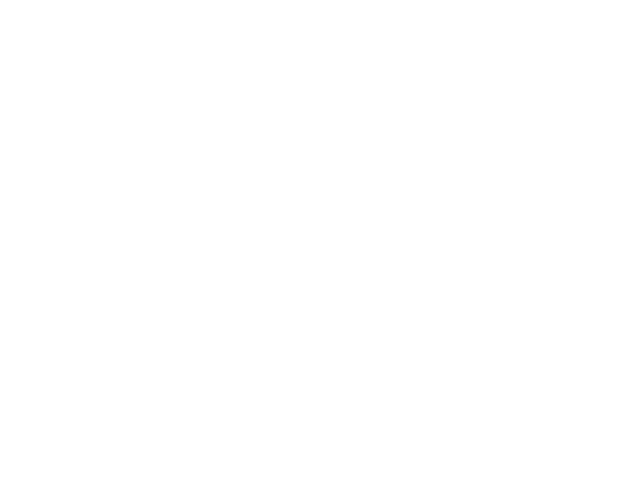

In [147]:
fig = plt.figure()
icutoff = 0
for icutoff in range(3):
    ax = fig.add_subplot(1,3,icutoff+1,projection='3d')
    for s in range(5):
        x = np.cumsum(np.concatenate(((0,),R[k][icutoff][s,:,:,0].mean(1))))
        y = np.cumsum(np.concatenate(((0,),R[k][icutoff][s,:,:,1].mean(1))))
        z = np.cumsum(np.concatenate(((0,),R[k][icutoff][s,:,:,2].mean(1))))
        ax.plot(x,y,z) #,np.cumsum(R[k][icutoff][s,:,:,2].mean(1)))

<IPython.core.display.Javascript object>


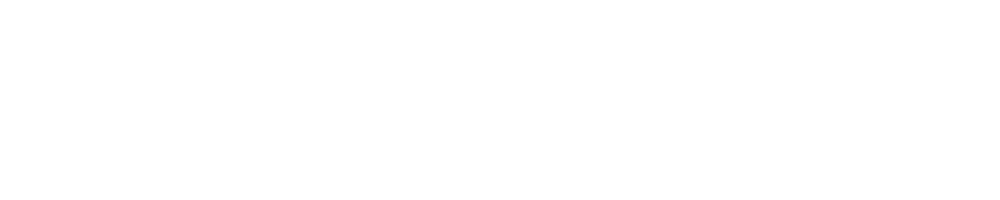

<IPython.core.display.Javascript object>


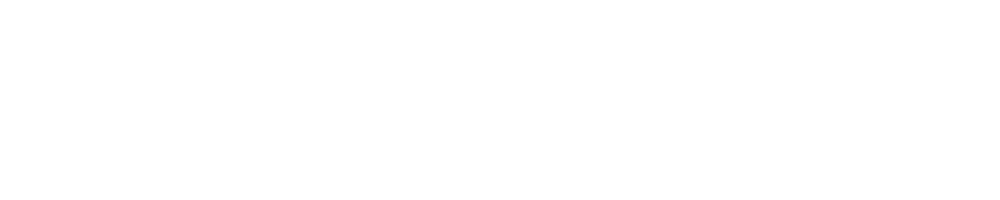

In [180]:
fig = plt.figure(figsize=(10,2))
for s in range(5):
    ax = plt.subplot(1,5,s+1,projection='3d')
    ax.view_init(0, 45)
    for c in range(6):
        lkat = k_and(contrast==c,size==s,angle==1)
        ax.scatter(v[0][lkat],v[1][lkat],v[2][lkat])
    ax.axis('off')
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.1,0.1)
    ax.set_zlim(-0.1,0.1)   
    
fig = plt.figure(figsize=(10,2))
for s in range(5):
    ax = plt.subplot(1,5,s+1,projection='3d')
    ax.view_init(0, -45)
    for c in range(6):
        lkat = k_and(contrast==c,size==s,angle==1)
        ax.scatter(v[0][lkat],v[1][lkat],v[2][lkat])
    ax.axis('off')
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.1,0.1)
    ax.set_zlim(-0.1,0.1)

<IPython.core.display.Javascript object>


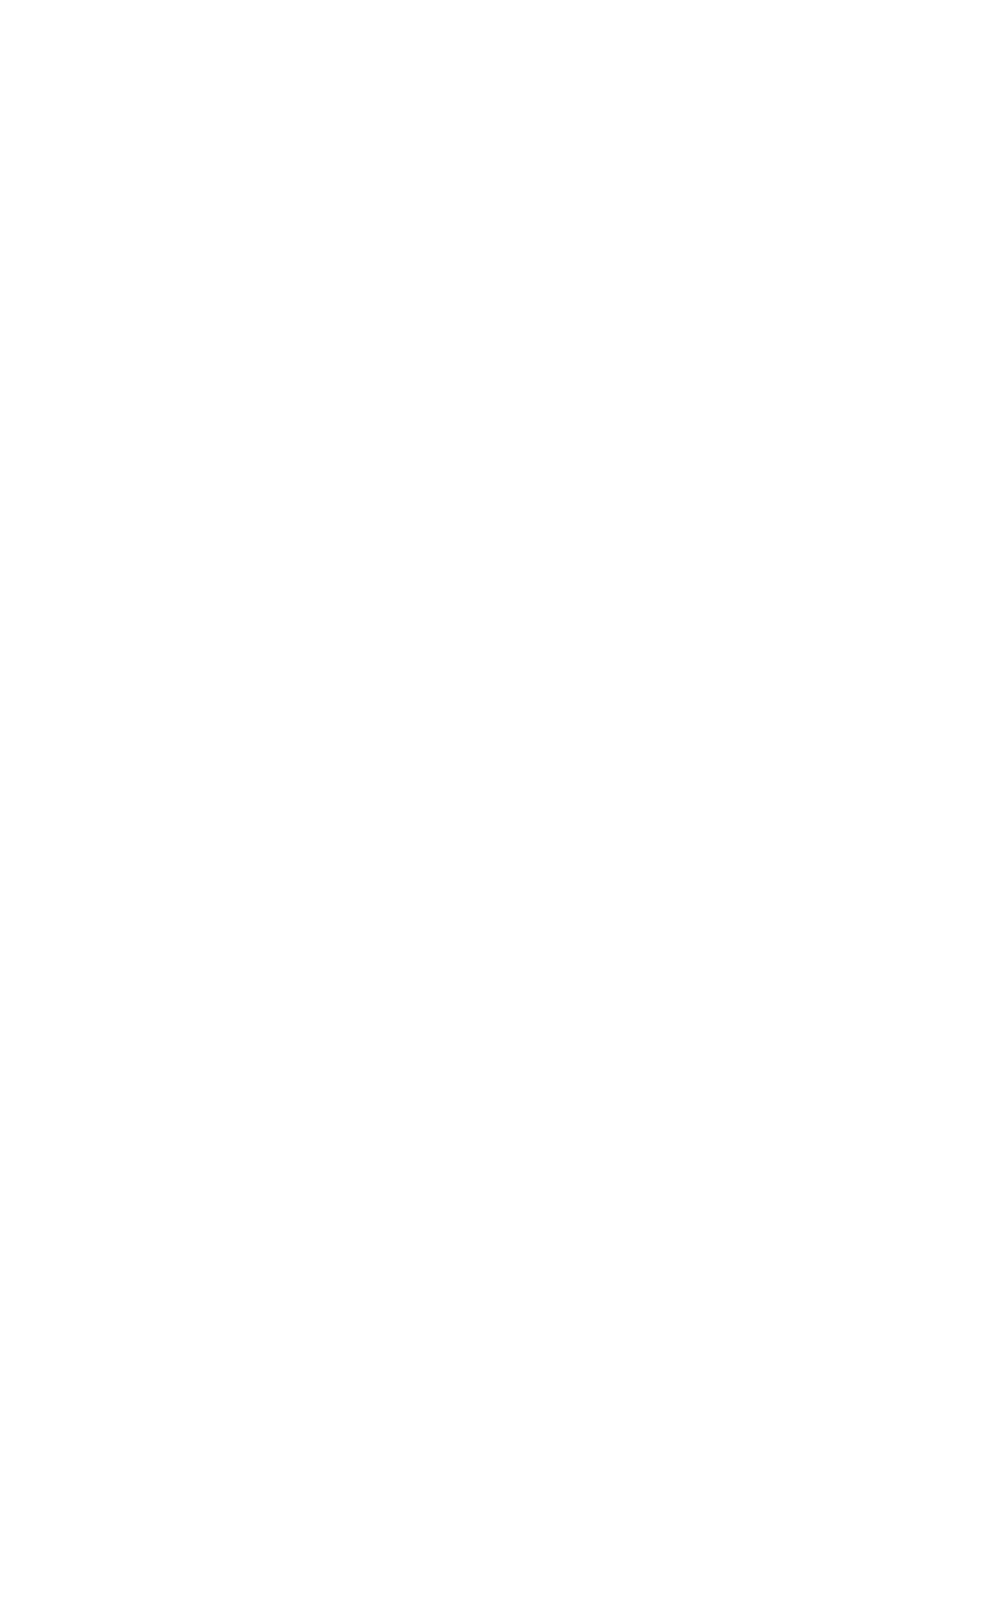

<IPython.core.display.Javascript object>


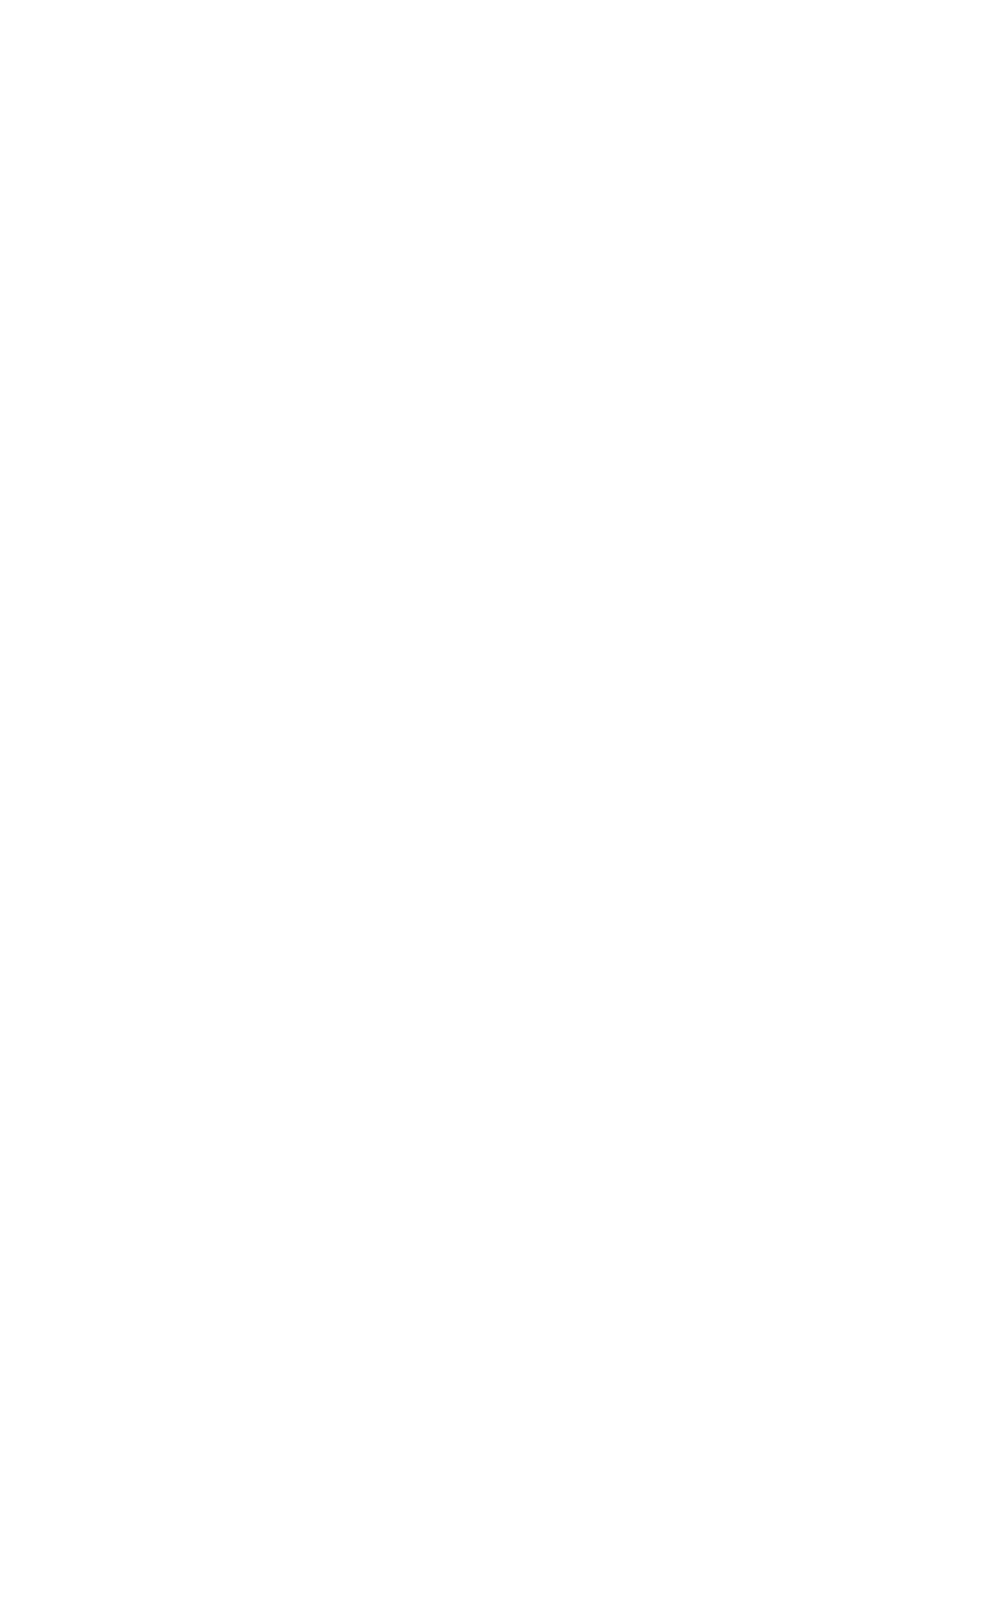

In [182]:
fig = plt.figure(figsize=(10,16))
for s in range(5):
    for a in range(8):
        ax = plt.subplot(8,5,a*5+s+1,projection='3d')
        ax.view_init(0, 45)
        for c in range(6):
            lkat = k_and(contrast==c,size==s,angle==a)
            ax.scatter(v[0][lkat],v[1][lkat],v[2][lkat])
        ax.axis('off')
        ax.set_xlim(-0.1,0.1)
        ax.set_ylim(-0.1,0.1)
        ax.set_zlim(-0.1,0.1)
    
fig = plt.figure(figsize=(10,16))
for s in range(5):
    for a in range(8):
        ax = plt.subplot(8,5,a*5+s+1,projection='3d')
        ax.view_init(0, -45)
        for c in range(6):
            lkat = k_and(contrast==c,size==s,angle==a)
            ax.scatter(v[0][lkat],v[1][lkat],v[2][lkat])
        ax.axis('off')
        ax.set_xlim(-0.1,0.1)
        ax.set_ylim(-0.1,0.1)
        ax.set_zlim(-0.1,0.1)

<IPython.core.display.Javascript object>


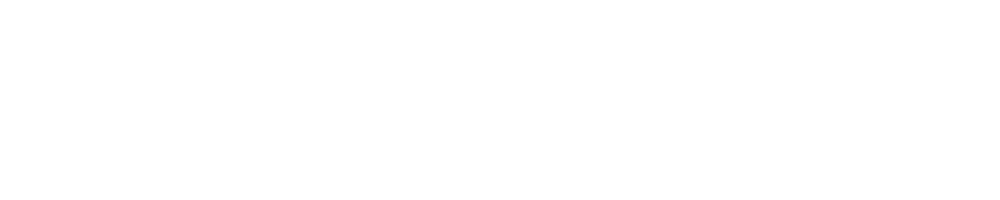

<IPython.core.display.Javascript object>


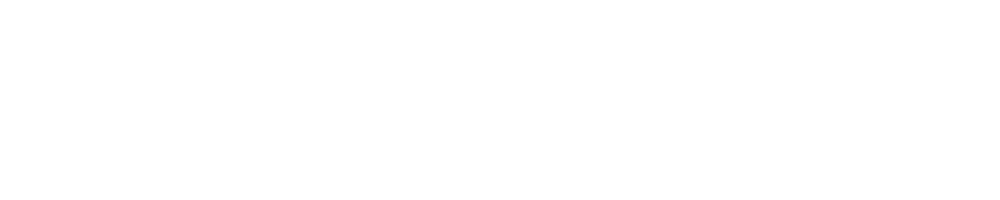

In [174]:
fig = plt.figure(figsize=(10,2))
for s in range(5):
    ax = plt.subplot(1,5,s+1,projection='3d')
    ax.view_init(0, 45)
    for c in range(6):
        lkat = k_and(contrast==c,size==s)
        ax.scatter(v[0][lkat],v[1][lkat],v[5][lkat],alpha=0.3)
    ax.axis('off')
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.1,0.1)
    ax.set_zlim(-0.1,0.1)   
    
fig = plt.figure(figsize=(10,2))
for s in range(5):
    ax = plt.subplot(1,5,s+1,projection='3d')
    ax.view_init(0, -45)
    for c in range(6):
        lkat = k_and(contrast==c,size==s)
        ax.scatter(v[0][lkat],v[1][lkat],v[7][lkat],alpha=0.3)
    ax.axis('off')
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.1,0.1)
    ax.set_zlim(-0.1,0.1)

<IPython.core.display.Javascript object>


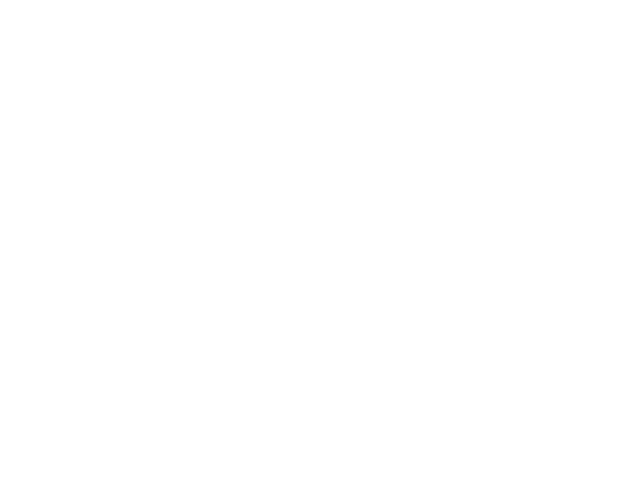

In [140]:
plt.figure()
plt.plot(top_score[k].mean(-1).mean(-1))

<IPython.core.display.Javascript object>


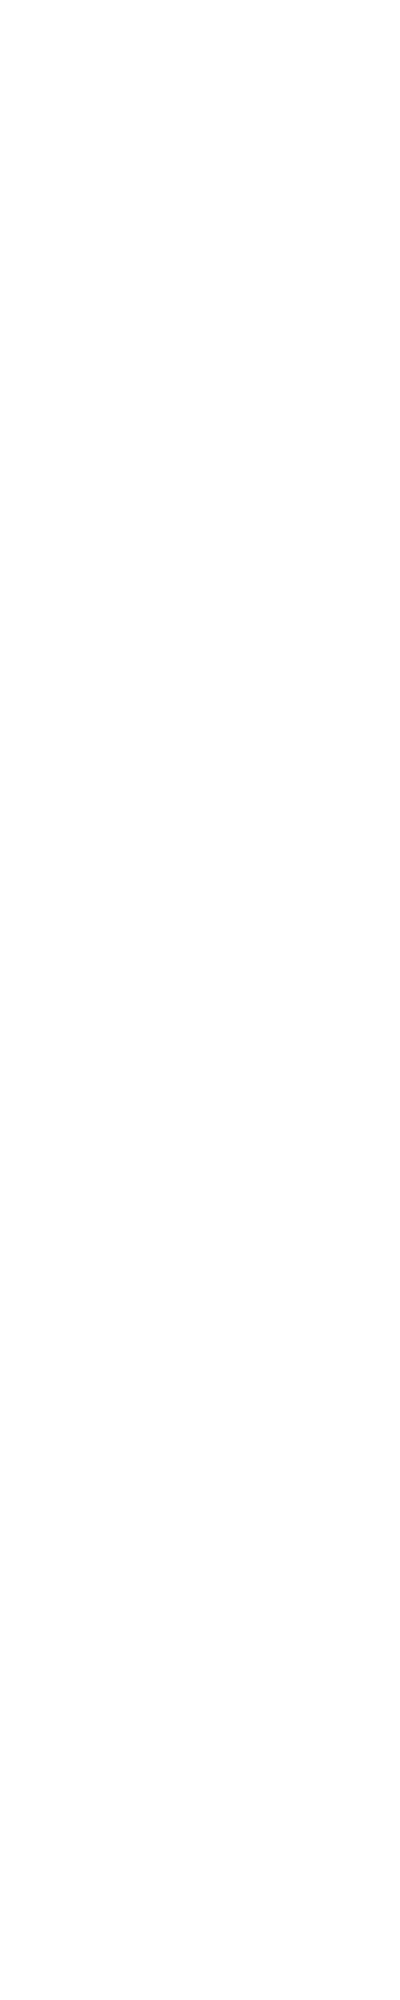

In [186]:
plt.figure(figsize=(4,20))
c = -1
k = 1
distance = dist_ret[ontarget_ret_lax]
N = 8
for s in range(N):
    regression_weight = u[:,s][ontarget_ret_lax]
    plt.subplot(N,1,s+1)
    plt.scatter(distance,regression_weight,s=5)
    binmean,binedge,_ = sst.binned_statistic(distance,regression_weight)
    binstd,_,_ = sst.binned_statistic(dist_ret[ontarget_ret_lax],regression_weight,statistic=sst.sem)
    plt.errorbar(0.5*(binedge[:-1]+binedge[1:]),binmean,binstd,c='r')
    plt.plot(0.5*(binedge[:-1]+binedge[1:]),np.zeros_like(binmean),c='k')
#     plt.ylim((-0.03,0.03))

<IPython.core.display.Javascript object>


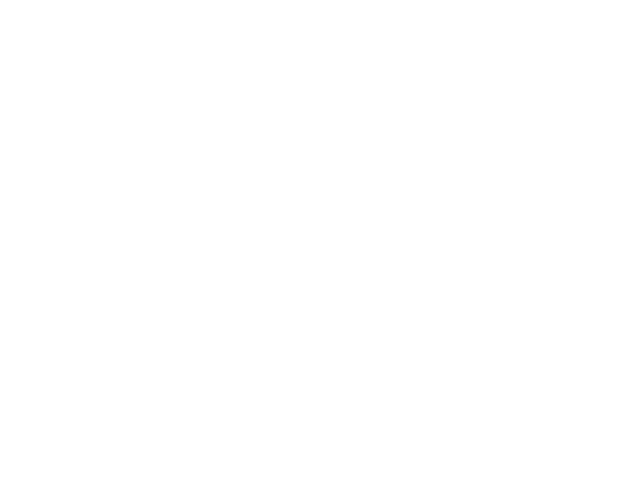

In [191]:
plt.figure()#figsize=(4,20))
c = -1
k = 1
distance = dist_ret[ontarget_ret_lax]
N = 8
regression_weight = -u[:,0][ontarget_ret_lax]+u[:,1][ontarget_ret_lax]
plt.scatter(distance,regression_weight,s=5)
binmean,binedge,_ = sst.binned_statistic(distance,regression_weight)
binstd,_,_ = sst.binned_statistic(dist_ret[ontarget_ret_lax],regression_weight,statistic=sst.sem)
plt.errorbar(0.5*(binedge[:-1]+binedge[1:]),binmean,binstd,c='r')
plt.plot(0.5*(binedge[:-1]+binedge[1:]),np.zeros_like(binmean),c='k')

In [190]:
plt.close('all')